# Flight Data Analysis
## by Luke DeMaster-Smith

<a id='top_of_page'></a>
## Table of Contents

- **[CURRENT LOCATION](#current_location)**
- **[RECENT LOCATION](#recent_location)**

- **[Preliminary Wrangling](#preliminary_wrangling)**
  - [Load and Preview Flight Data](#preliminary_wrangling_load_flight_data)
  - [Load Carrier Data](#preliminary_wrangling_load_carrier_data)
  - [Structure of Dataset](#preliminary_wrangling_structure)
  - [Main Features](#preliminary_wrangling_main_features)
  - [Features to Focus On](#preliminary_wrangling_features_to_focus_on)

- **[Univariate Exploration](#univariate_exploration)**
  - [Delay Variables - Initial Observations](#univariate_delay_initial_observations)
  - [Delay Variables - Additional Observations](#univariate_delay_additional_observations)
  - [Other Numeric Variables - Initial Observations](#univariate_otherNumericVar_initial_observations)
  - [Summary](#univariate_exploration_summary)
    - [Distributions of Interest](#univariate_exploration_describe_distributions_of_interest)
    - [Unusual distributions and Modifications](#univariate_exploration_unusual_distributions_and_modifications)

- **[Bivariate Exploration](#bivariate_exploration)**
  - [Heat Maps](#bivariate_exploration_heatMaps)
  - [Violin Plots](#bivariate_exploration_violinPlots)
  - [Box Plots](#bivariate_exploration_boxPlots)
  - [Scatter Plots](#bivariate_exploration_scatterPlots)
  - [Ridgeline Plots](#bivariate_exploration_ridgeline_Plots)
  - [Swarm Plots](#bivariate_exploration_swarmPlots)
  - [Summary](#bivariate_exploration_summary)
    - [Relationships Observed](#bivariate_exploration_relationships_observed)
    - [Unexpected Relationships](#bivariate_exploration_relationships_observed_unexpected)

- **[Multivariate Exploration](#multivariate_exploration)**
  - [Relationships Observed](#multivariate_exploration_relationships_observed)
  - [Interesting Interactions](#multivariate_exploration_relationships_observed_interesting_interactions)
  
- **[References and Dead Ends](#references_and_dead_ends)**
  - [References](#references)
  - [Dead Ends](#dead_ends)
    - [Preliminary Wrangling](#dead_ends_preliminary_wrangling)
    - [Univariate Exploration](#dead_ends_univariate_exploration)
      - [Log Scale Histograms](#dead_ends_univariate_logScale_histograms)
      - [Clean Histograms, Standard Scale, Single Variable](#dead_ends_univariate_cleanHist_singleVar_standardScale)
      - [Clean Histograms, Standard Scale, Multiple Variables](#dead_ends_univariate_cleanHist_multiVar_standardScale)
      - [Density Plots](#dead_ends_univariate_density_plot_histogram)
- **[Templates](#templates)**

<a id='preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time           # for timing operations on large dataframes

import random
random.seed(42)       # to assure any samples are the same each time the kernel is restarted

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

<a id='preliminary_wrangling_load_flight_data'></a>
([Top of Page](#top_of_page))

**Load and Preview Flight Data**

In [2]:
# load a single year's dataset into a pandas dataframe
start = time.time()
flights = pd.read_csv('2008.csv')           #flights_2008
end = time.time()

currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

time elapsed: 36.164910078048706, current time: 11:46:28


In [3]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


* There are over 7 million rows, and it took 36 seconds to load the csv. That is a lot of data.
* I am going to sample the data to speed up analysis and plotting.
* If my analysis leads me to some metric or plot that would clearly benefit from a larger sample size (or the whole dataframe?), I will adjust the dataframe accordingly.
* Since I primarily plan to look for trends though, I suspect a sufficiently large sample size (say..50000) will be sufficient.
* I will backup the data first, in case I need a larger sample size or the whole dataframe at some point.

In [4]:
flights_all = flights.copy(deep=True)

In [5]:
# sample 50000 flights, then display head to get a better sense of the data
random.seed(42)       # to assure any samples are the same each time the kernel is restarted
samples = np.random.choice(flights_all.shape[0], 50000, replace = False)
flights = flights_all.loc[samples,:]
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
739977,2008,2,19,2,819.0,825,938.0,951,YV,7107,...,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2966461,2008,5,28,3,1054.0,1100,1315.0,1321,CO,1004,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1445612,2008,3,7,5,1219.0,1150,1439.0,1356,US,1814,...,2.0,39.0,0,NaN,0,1.0,0.0,14.0,0.0,28.0
4159356,2008,7,22,2,726.0,735,1047.0,1106,AS,680,...,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1266568,2008,3,30,7,2054.0,2040,2330.0,2315,WN,442,...,8.0,8.0,0,NaN,0,3.0,0.0,1.0,0.0,11.0
2151151,2008,4,19,6,2113.0,2120,2239.0,2256,FL,192,...,5.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1632379,2008,3,1,6,905.0,826,1206.0,1121,NW,1644,...,7.0,15.0,0,NaN,0,6.0,0.0,6.0,0.0,33.0
2195067,2008,4,8,2,1048.0,1100,1158.0,1159,MQ,4316,...,9.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1018296,2008,2,3,7,1300.0,1304,1408.0,1411,NW,791,...,8.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2511251,2008,5,3,6,849.0,850,926.0,922,XE,2724,...,8.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**<br>Determine which columns are not shown above, then visualize them<br><br>**

In [6]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
cols_to_show = ['TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'ActualElapsedTime',
                'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance']

In [8]:
flights[cols_to_show].head(10)

,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
739977,N447YV,79.0,86.0,62.0,-13.0,79.0,86.0,62.0,-13.0,-6.0,DEN,CPR,230
2966461,N39728,141.0,141.0,127.0,-6.0,141.0,141.0,127.0,-6.0,-6.0,MCO,CLE,895
1445612,N406US,140.0,126.0,99.0,43.0,140.0,126.0,99.0,43.0,29.0,CLT,RSW,600
4159356,N623AS,141.0,151.0,127.0,-19.0,141.0,151.0,127.0,-19.0,-9.0,PDX,DEN,992
1266568,N366SW,96.0,95.0,80.0,15.0,96.0,95.0,80.0,15.0,14.0,MSY,MCO,550
2151151,N344AT,86.0,96.0,69.0,-17.0,86.0,96.0,69.0,-17.0,-7.0,ATL,RSW,515
1632379,N320NB,121.0,115.0,99.0,45.0,121.0,115.0,99.0,45.0,39.0,MEM,DCA,762
2195067,N612AE,70.0,59.0,41.0,-1.0,70.0,59.0,41.0,-1.0,-12.0,CID,ORD,196
1018296,N775NC,68.0,67.0,44.0,-3.0,68.0,67.0,44.0,-3.0,-4.0,MSP,MKE,297
2511251,N14960,97.0,92.0,80.0,4.0,97.0,92.0,80.0,4.0,-1.0,CLE,BNA,448


In [9]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.0,50000.000000,50000.000000,50000.000000,49044.000000,50000.00000,48944.000000,50000.000000,50000.000000,48924.000000,...,50000.000000,48944.000000,49038.000000,50000.000000,50000.000000,10706.000000,10706.000000,10706.000000,10706.000000,10706.000000
mean,2008.0,6.385540,15.671520,3.928520,1330.415137,1322.34512,1482.452088,1495.442700,2237.532200,126.830656,...,721.855860,6.879250,16.485012,0.019380,0.002140,15.815244,3.290211,17.473473,0.076966,20.878853
std,0.0,3.410726,8.793696,1.984764,476.268805,462.55006,501.727025,479.407129,1975.090496,69.162383,...,554.796368,4.962863,11.201339,0.137858,0.046211,40.676620,21.425080,33.894196,1.692376,40.052077
min,2008.0,1.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000,1.000000,20.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,925.000000,925.00000,1108.000000,1115.000000,625.000000,77.000000,...,325.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1322.000000,1315.00000,1512.000000,1517.000000,1571.500000,110.000000,...,580.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1725.000000,1714.00000,1907.000000,1905.000000,3565.250000,157.000000,...,950.000000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,27.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.00000,2400.000000,2400.000000,7829.000000,631.000000,...,4962.000000,140.000000,309.000000,1.000000,1.000000,801.000000,710.000000,1195.000000,81.000000,889.000000


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 739977 to 5958828
Data columns (total 29 columns):
Year                 50000 non-null int64
Month                50000 non-null int64
DayofMonth           50000 non-null int64
DayOfWeek            50000 non-null int64
DepTime              49044 non-null float64
CRSDepTime           50000 non-null int64
ArrTime              48944 non-null float64
CRSArrTime           50000 non-null int64
UniqueCarrier        50000 non-null object
FlightNum            50000 non-null int64
TailNum              49432 non-null object
ActualElapsedTime    48924 non-null float64
CRSElapsedTime       49992 non-null float64
AirTime              48924 non-null float64
ArrDelay             48924 non-null float64
DepDelay             49044 non-null float64
Origin               50000 non-null object
Dest                 50000 non-null object
Distance             50000 non-null int64
TaxiIn               48944 non-null float64
TaxiOut              490

In [11]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.0,50000.000000,50000.000000,50000.000000,49044.000000,50000.00000,48944.000000,50000.000000,50000.000000,48924.000000,...,50000.000000,48944.000000,49038.000000,50000.000000,50000.000000,10706.000000,10706.000000,10706.000000,10706.000000,10706.000000
mean,2008.0,6.385540,15.671520,3.928520,1330.415137,1322.34512,1482.452088,1495.442700,2237.532200,126.830656,...,721.855860,6.879250,16.485012,0.019380,0.002140,15.815244,3.290211,17.473473,0.076966,20.878853
std,0.0,3.410726,8.793696,1.984764,476.268805,462.55006,501.727025,479.407129,1975.090496,69.162383,...,554.796368,4.962863,11.201339,0.137858,0.046211,40.676620,21.425080,33.894196,1.692376,40.052077
min,2008.0,1.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000,1.000000,20.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,925.000000,925.00000,1108.000000,1115.000000,625.000000,77.000000,...,325.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1322.000000,1315.00000,1512.000000,1517.000000,1571.500000,110.000000,...,580.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1725.000000,1714.00000,1907.000000,1905.000000,3565.250000,157.000000,...,950.000000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,27.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.00000,2400.000000,2400.000000,7829.000000,631.000000,...,4962.000000,140.000000,309.000000,1.000000,1.000000,801.000000,710.000000,1195.000000,81.000000,889.000000


<a id='preliminary_wrangling_load_carrier_data'></a>
([Top of Page](#top_of_page))

**Load Carrier Data**

In [12]:
# load carrier codes
start = time.time()
carriers = pd.read_csv('carriers.csv')
end = time.time()

currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

time elapsed: 0.011964082717895508, current time: 11:46:42


In [13]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [14]:
carriers.shape

(1491, 2)

<a id='preliminary_wrangling_structure'></a>
([Top of Page](#top_of_page))
### What is the structure of your dataset?

> Your answer here!

* There are over 7 million rows in the dataset. That is a lot of data. I decided to sample 50000 of them in order to have a dataset that is large enough to analyze trends, but small enough to allow quick analysis and plotting.
* Most variables are numeric with type float.
* There appear to be NAN entries for some features. These rows may need to be dropped.

<a id='preliminary_wrangling_main_features'></a>
([Top of Page](#top_of_page))
### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

I am mostly interested in the flight delays and determining which features best predict the amount of delay.

<a id='preliminary_wrangling_features_to_focus_on'></a>
([Top of Page](#top_of_page))
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

I suspect that delays will be the longest during the winter months and on holidays. I also suspect that delays will be longer on the weekends, and longer at some airports than others.

<a id='univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

* Here is a reference for [setting matplotlib title properties](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)

* Reference [for adding text to matplotlib plots](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)

* Reference for [adding a figure title and subplot titles](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html)

**Define a function to plot multiple standard scale histograms**

In [15]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

In [50]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

# ------------ SKIP ------------

**Create standard scale histograms**

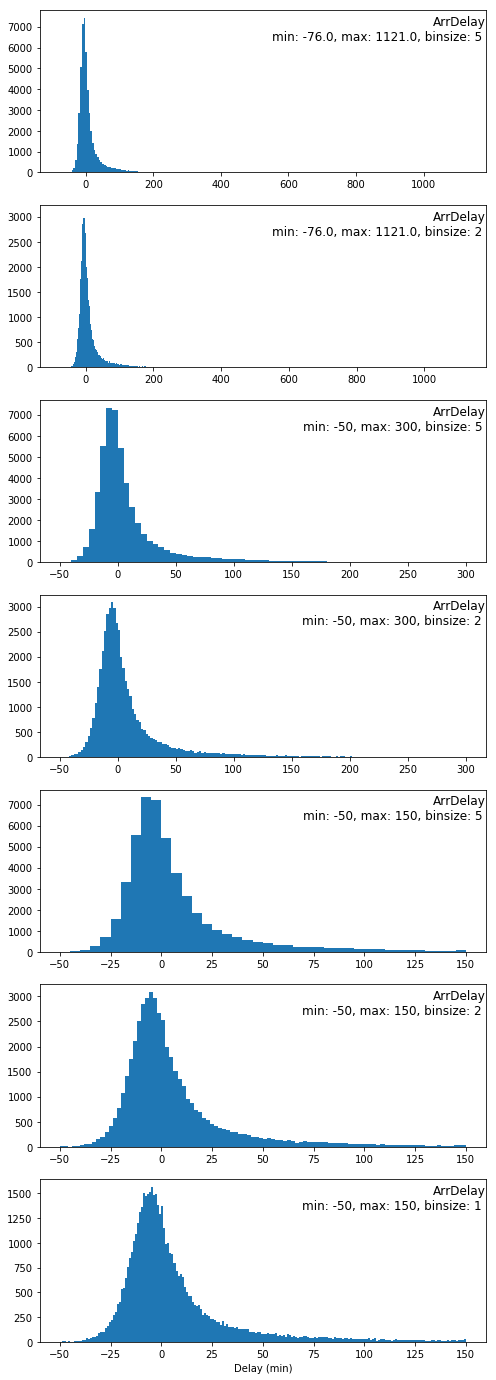

------------------------------------------------------------------------------------


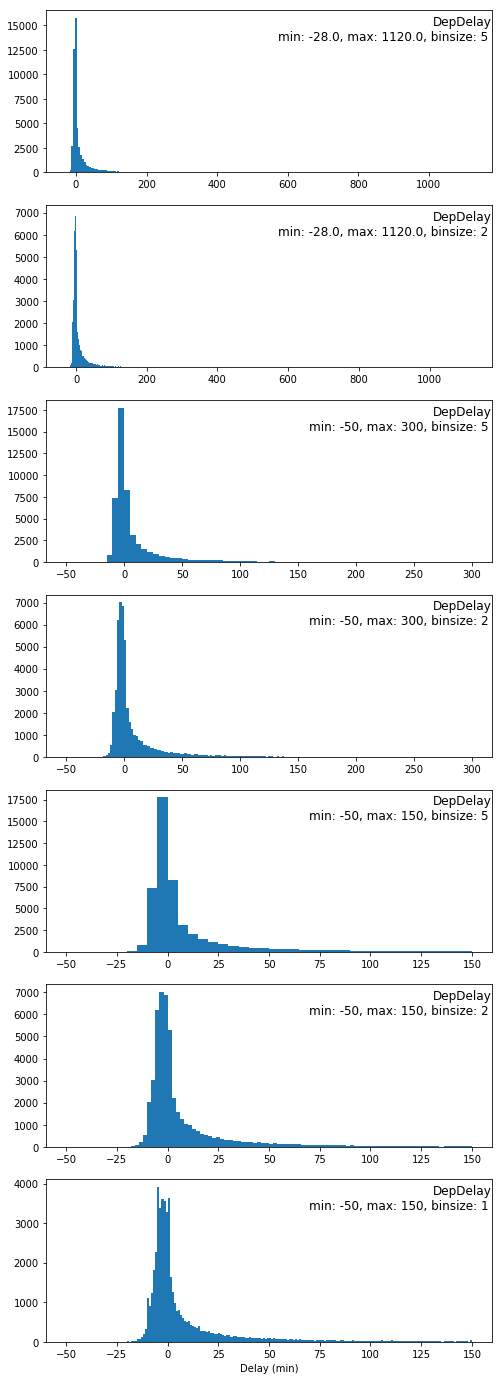

------------------------------------------------------------------------------------


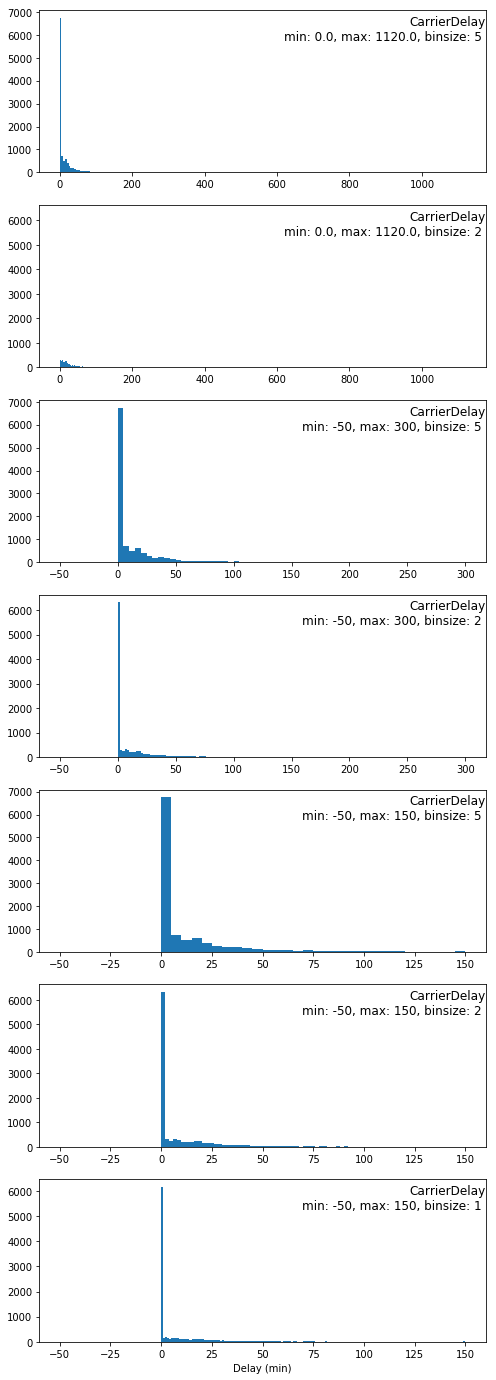

------------------------------------------------------------------------------------


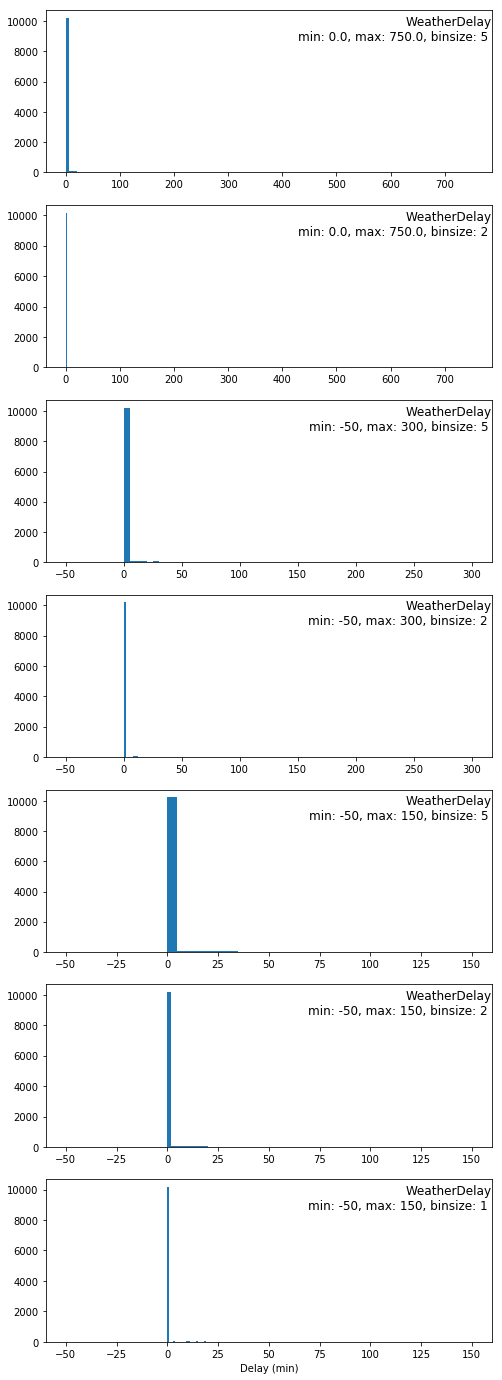

------------------------------------------------------------------------------------


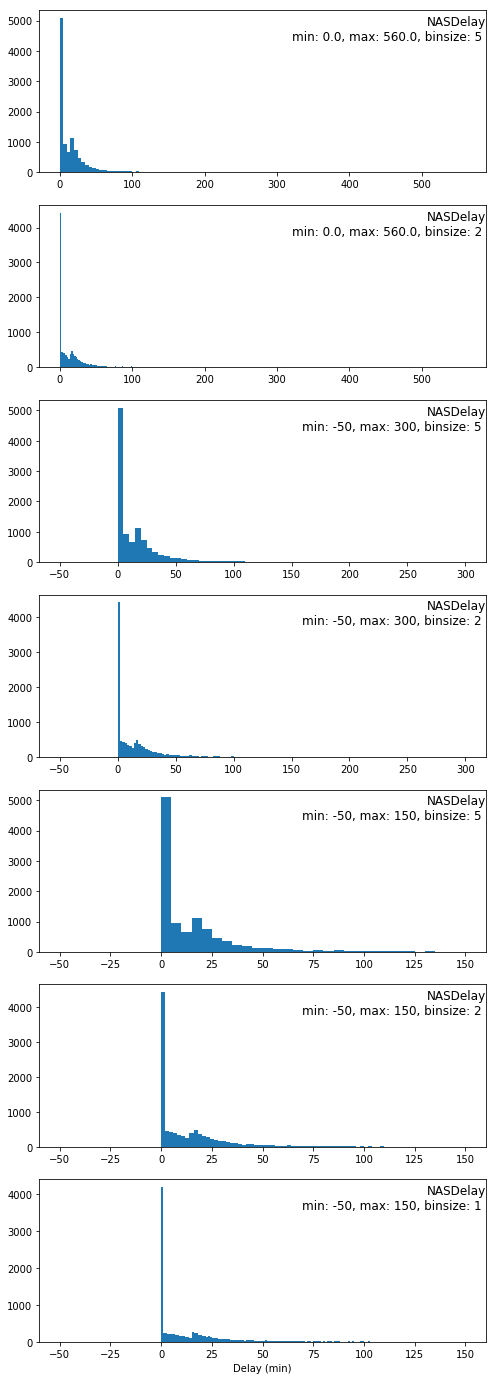

------------------------------------------------------------------------------------


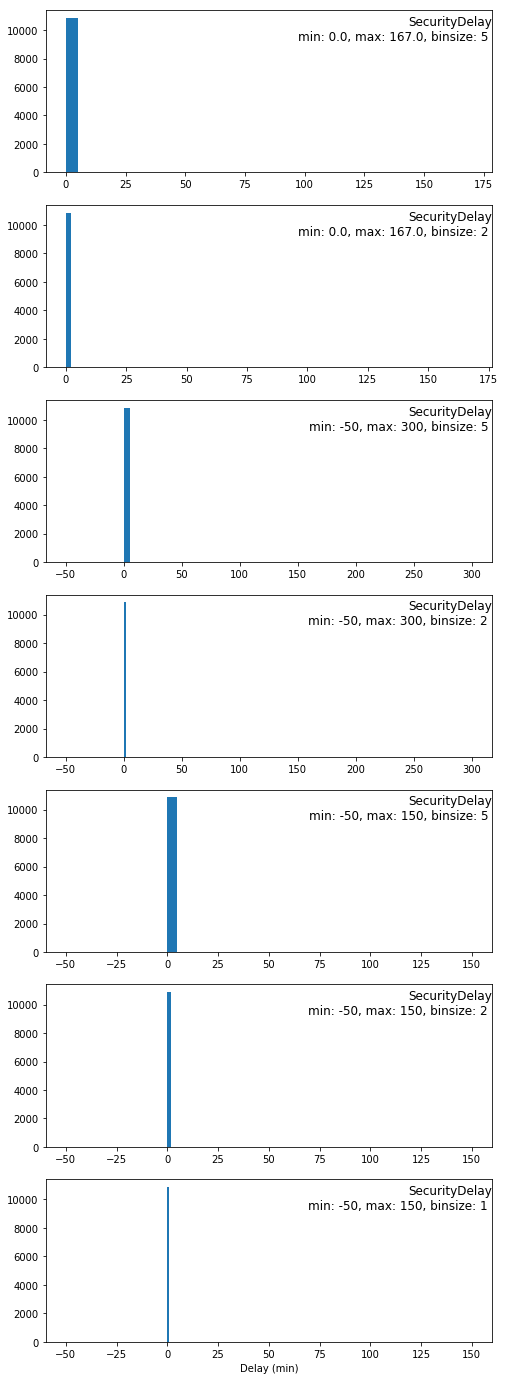

------------------------------------------------------------------------------------


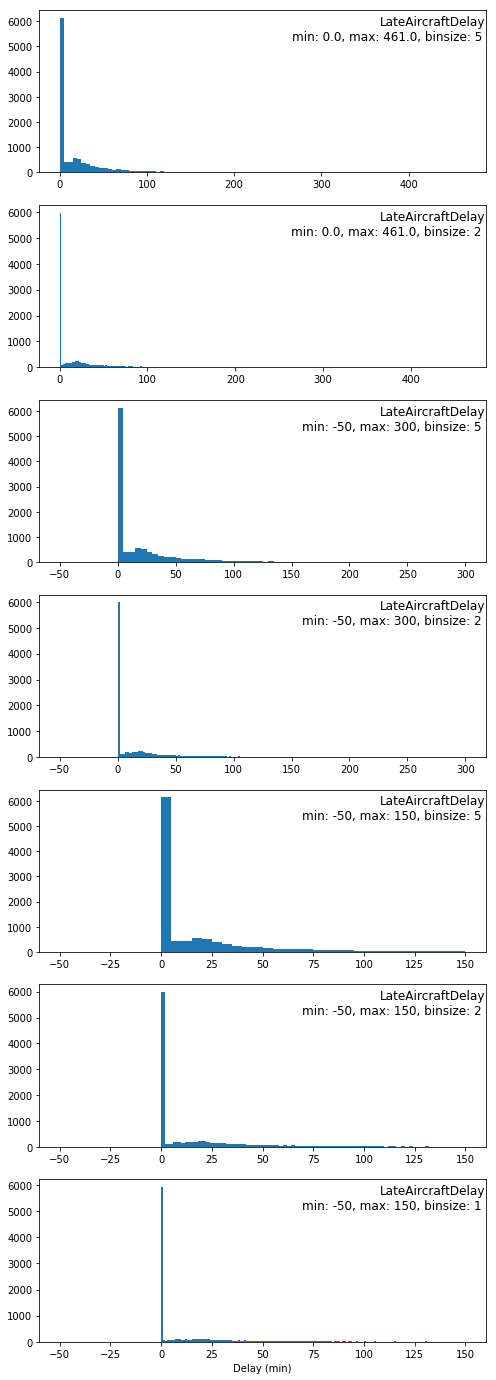

------------------------------------------------------------------------------------


In [17]:
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 7;
for i in range(len(vars)):
    var = vars[i]
    min_values = [flights[var].min(), flights[var].min(),
                  -50, -50, -50, -50, -50]
    max_values = [flights[var].max(), flights[var].max(),
                  300, 300, 150, 150, 150]
    binsizes = [5, 2, 5, 2, 5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

**'ArrDelay' Distribution**

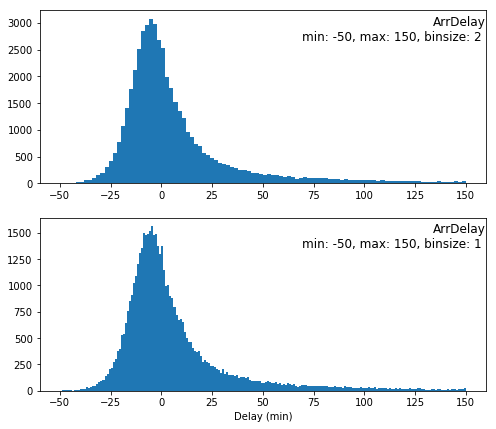

In [18]:
vars = ['ArrDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [-50, -50]
    max_values = [150, 150]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'DepDelay' Distribution**

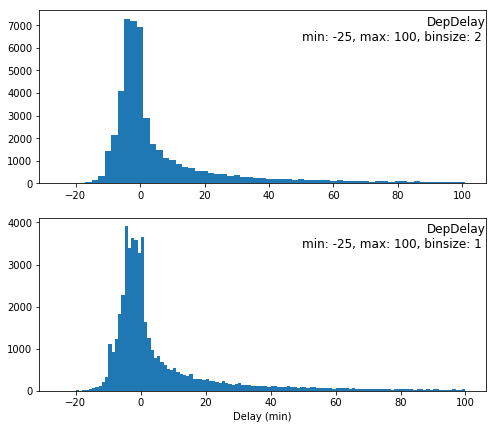

In [19]:
vars = ['DepDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [-25, -25]
    max_values = [100, 100]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

In [20]:
print(vars)

['DepDelay']


<a id='univariate_delay_initial_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Initial Observations**

* **'ArrDelay'** and **'DepDelay'** have roughly normal distributions around zero, albeit with some outliers causing a right-handed skew.
* **'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'** each have a large number of points at or very near zero. This is disguising the true nature of these distributions.
  * These distributions will have to be explored in greater detail
* **'NASDelay'** seems to have bi-modal distribution, which was not expected.
  * This bears further exploration.
* **'SecurityDelay'** seems to be almost uniformly zero.
  * It turns out this parameter is not _uniformly_ zero, but since it is _mostly_ zeros, this parameter is not a large driver of delays and will be ignored
* **'LateAircraftDelay'** seems to have a spike in frequency around 20 minutes

**Define a function to plot multiple log scale histograms**

In [32]:
def plot_histograms_logAxis(flights, var, xaxis_label, numPlots, max_vals, log_binsizes, ticks):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    labels = ['{}'.format(v) for v in ticks]
    for i in range(numPlots):
        #bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])        
        #bin_edges =       np.arange(min_vals[i],            max_vals[i]+binsizes[i], binsizes[i])
        bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_xscale('log')
        ax[i].xaxis.set_ticks(ticks)
        ax[i].xaxis.set_ticklabels(labels)
        ax[i].set_title(flights[var].name + '\n' +
                        'max: ' + str(max_vals[i]) +
                        ', log_binsize: ' +
                        str(log_binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

**Create log-scale histograms of the variables that have a large number of points near zero**

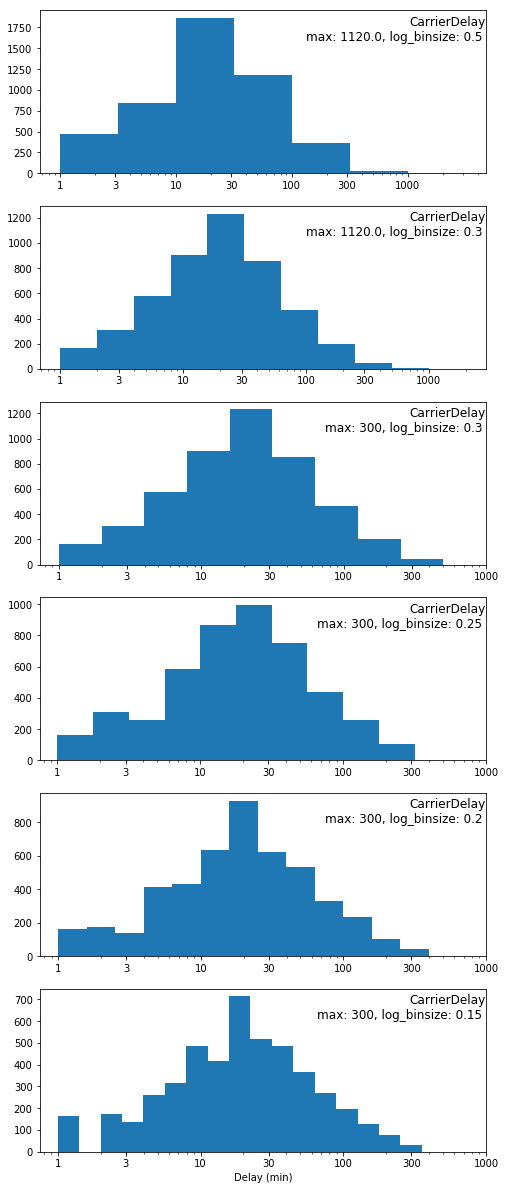

------------------------------------------------------------------------------------


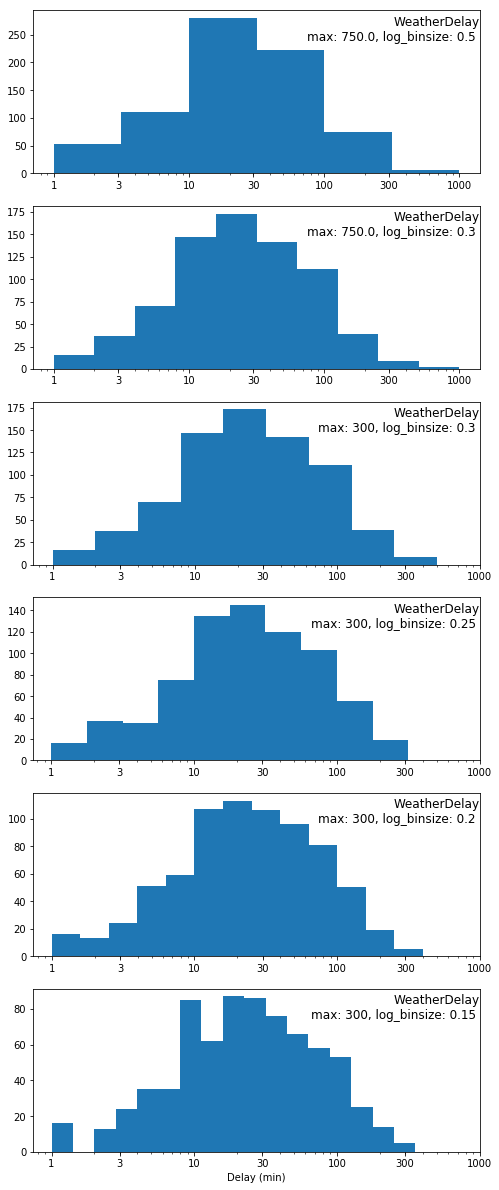

------------------------------------------------------------------------------------


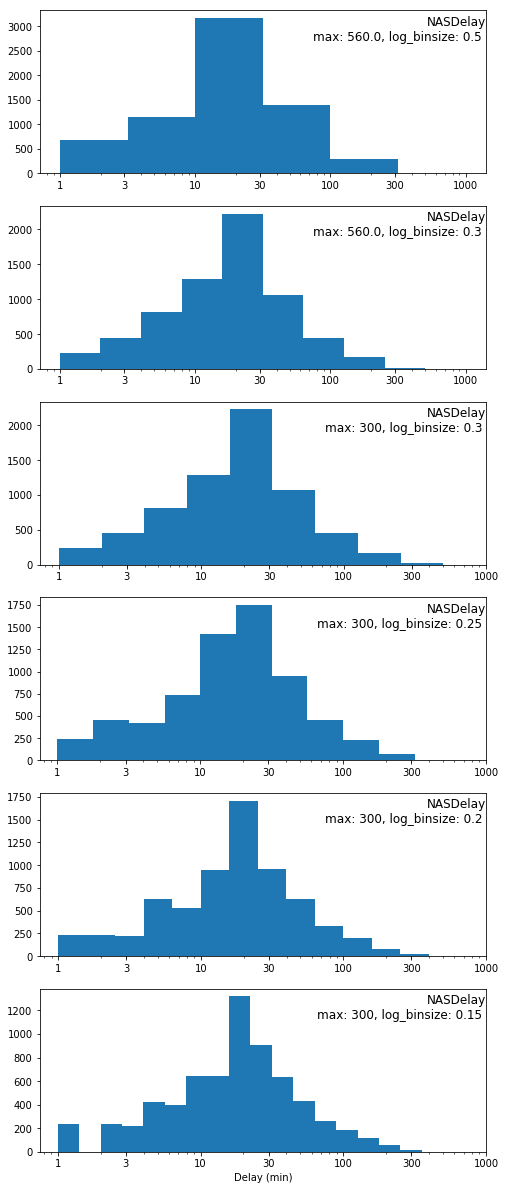

------------------------------------------------------------------------------------


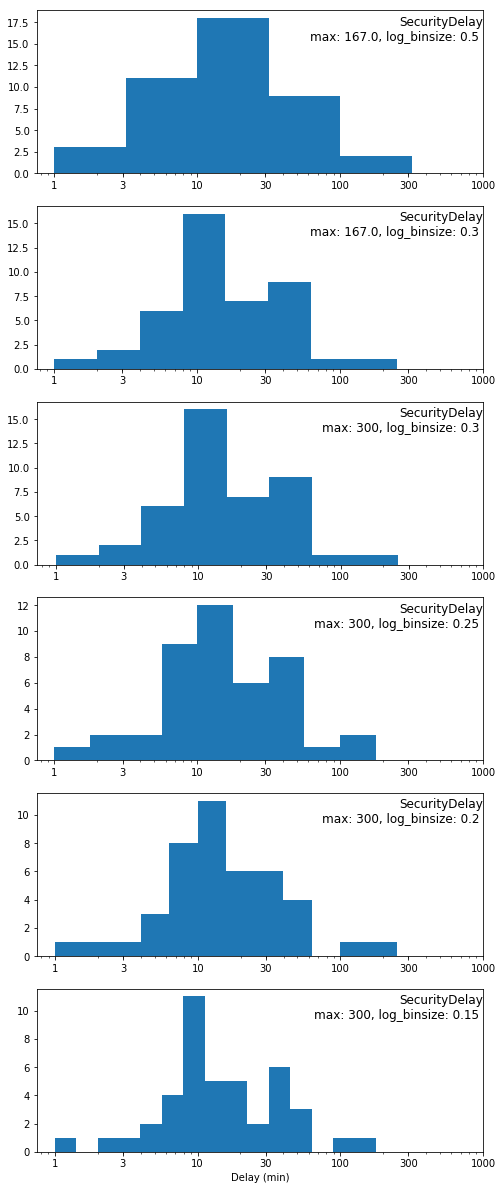

------------------------------------------------------------------------------------


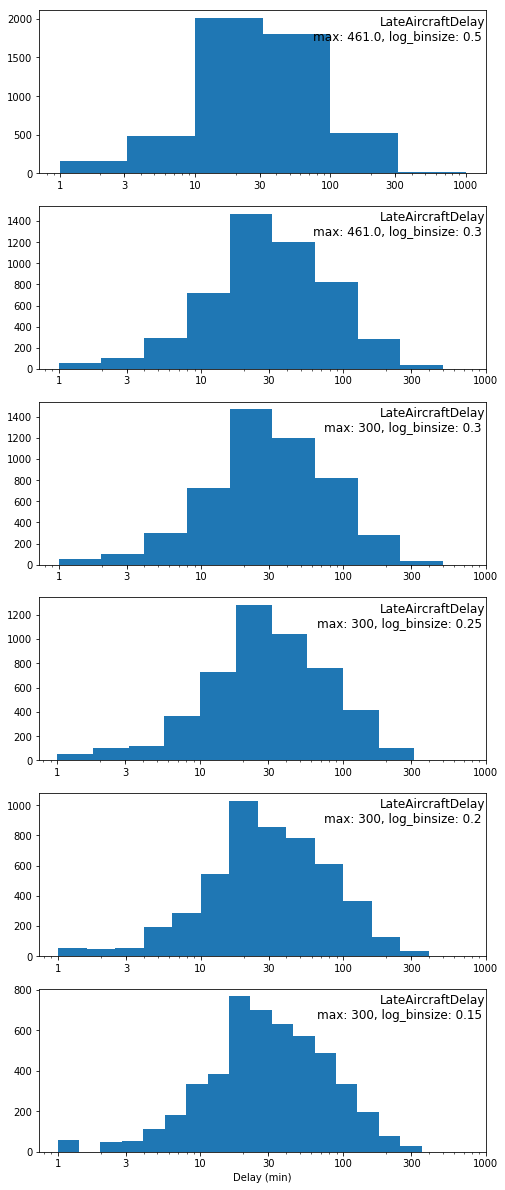

------------------------------------------------------------------------------------


In [22]:
vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 6;
for i in range(len(vars)):
    var = vars[i]
    max_values = [flights[var].max(),
                  flights[var].max(),
                  300, 300, 300, 300]
    log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)
    print('------------------------------------------------------------------------------------')

**Create standard scale histograms of the variables that have a large number of points near zero**
* Start these histograms at a value larger than zero

**'CarrierDelay' distribution**

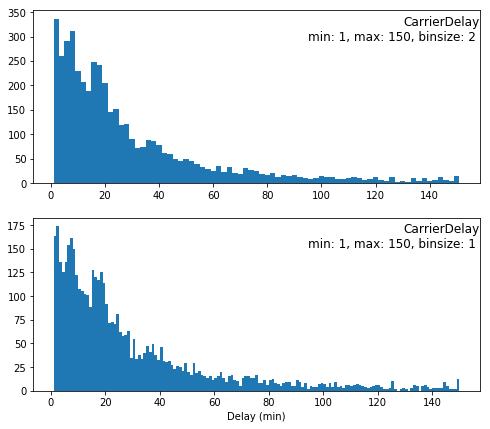

In [23]:
vars = ['CarrierDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 150]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'WeatherDelay' distribution**

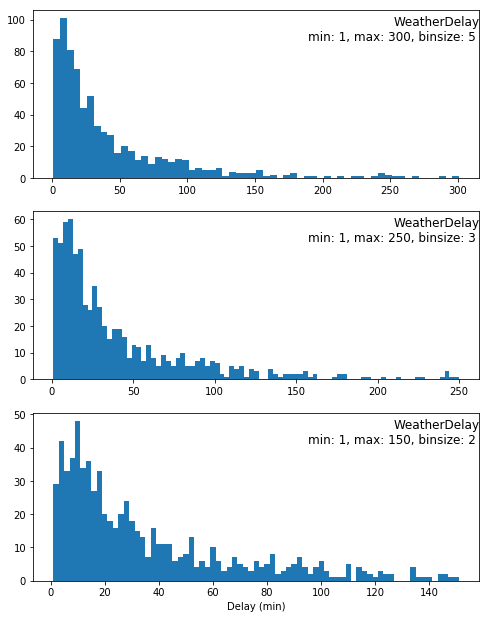

In [24]:
vars = ['WeatherDelay']
numPlots = 3;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1, 1]
    max_values = [300, 250, 150]
    binsizes = [5, 3, 2]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'NASDelay' Distribution**

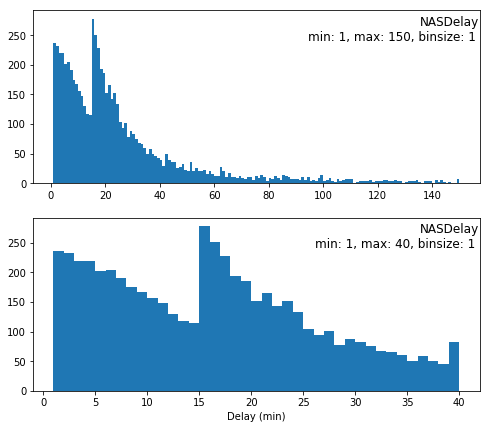

In [25]:
vars = ['NASDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 40]
    binsizes = [1, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'LateAircraftDelay' Distribution**

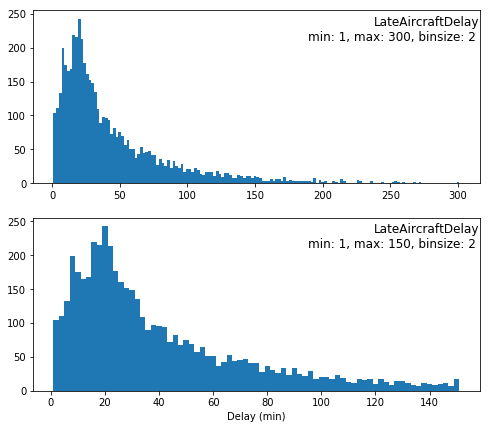

In [26]:
vars = ['LateAircraftDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [300, 150]
    binsizes = [2, 2]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='univariate_delay_additional_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Additional Observations**

* **'CarrierDelay'** - appears to be logarithmic
* **'WeatherDelay'** - appears to be roughly logarithmic as well, albeit noisier than 'CarrierDelay'
* **'NASDelay'** (i.e., National Air System Delay) - has a large spike in frequency at 15 minutes. This probably represents some sort of standard delay.
* **'LateAircraftDelay'** - has a spike at roughly 20 minutes, after which it is approximately logarithmic

**Create log scale histograms of the variables that have a large number of points near zero**

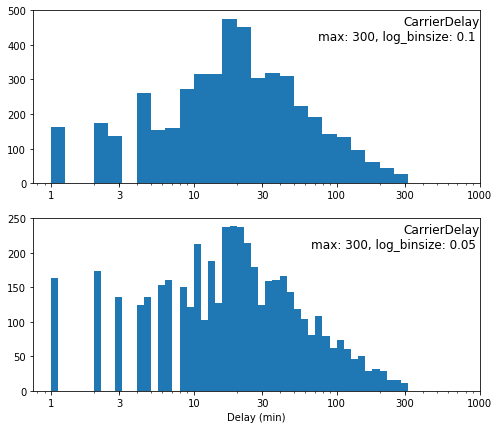

In [27]:
vars = ['CarrierDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    max_values = [300, 300]
    log_binsizes = [0.1, 0.05]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)

In [28]:
# vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay',  'LateAircraftDelay']
# numPlots = 7;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [1, 1, 1, 1, 1, 1, 1]
#     max_values = [flights[var].max(), flights[var].max(),
#                   300, 300, 150, 150, 150]
#     binsizes = [5, 2, 5, 2, 5, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
#     print('------------------------------------------------------------------------------------')

# ------------ RESUME ------------

**Select other variables for exploration**

In [51]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Numerical variables to analyze (distributions):
* Month
* DepTime
* CRSDepTime
* ArrTime
* CRSArrTime
* ActualElapsedTime
* CRSElapsedTime
* AirTime
* Distance
* TaxiIn
* TaxiOut
* Cancelled
* Diverted

Categorical variables to analyze (bar charts):
* UniqueCarrier
* Origin
* Dest
* CancellationCode

In [52]:
vars_distr = ['Month', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
              'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']

vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

# ------------ SKIP ------------

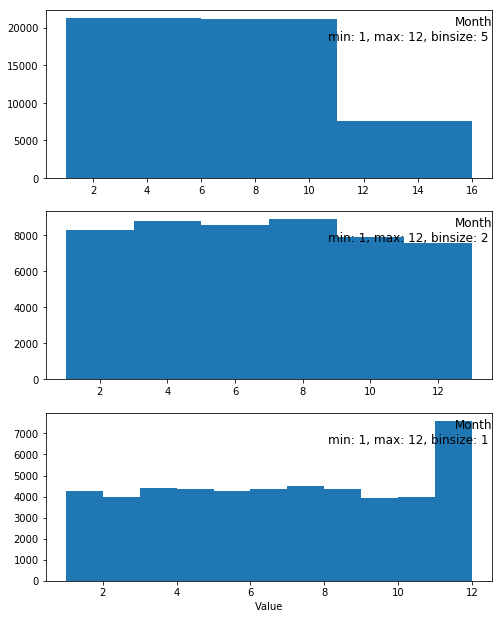

------------------------------------------------------------------------------------


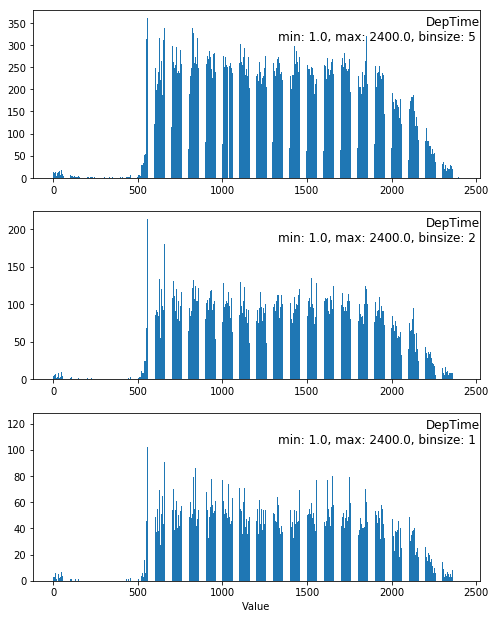

------------------------------------------------------------------------------------


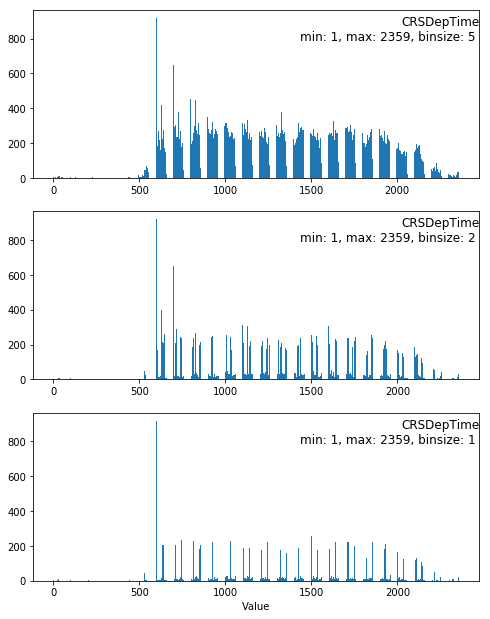

------------------------------------------------------------------------------------


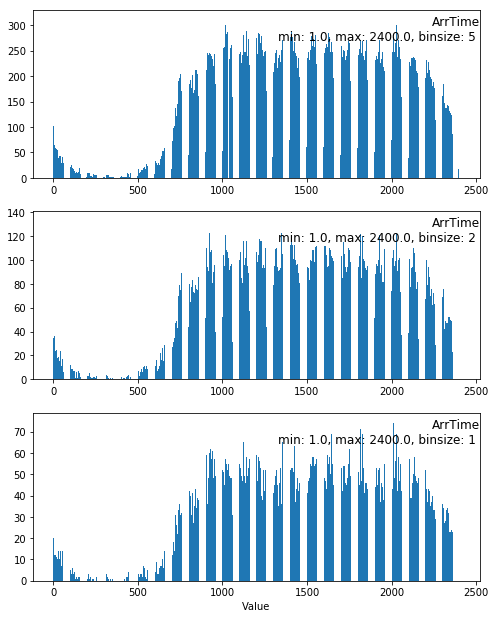

------------------------------------------------------------------------------------


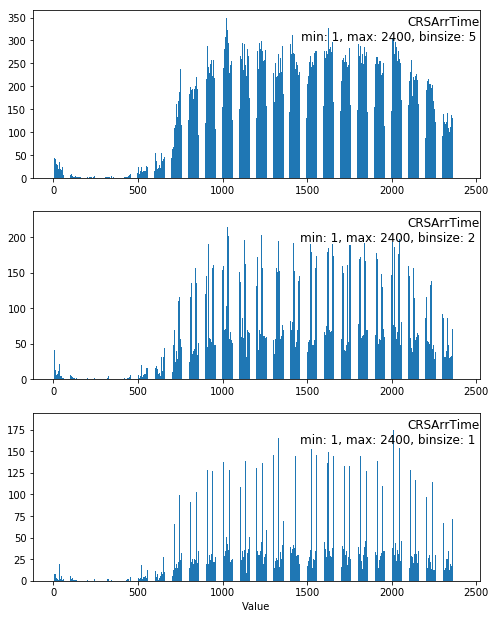

------------------------------------------------------------------------------------


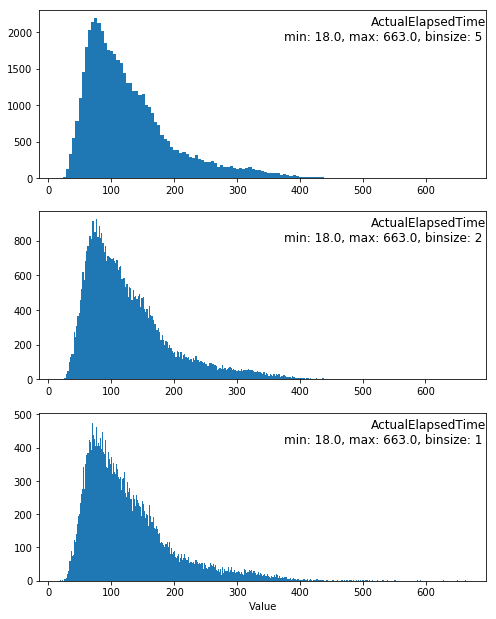

------------------------------------------------------------------------------------


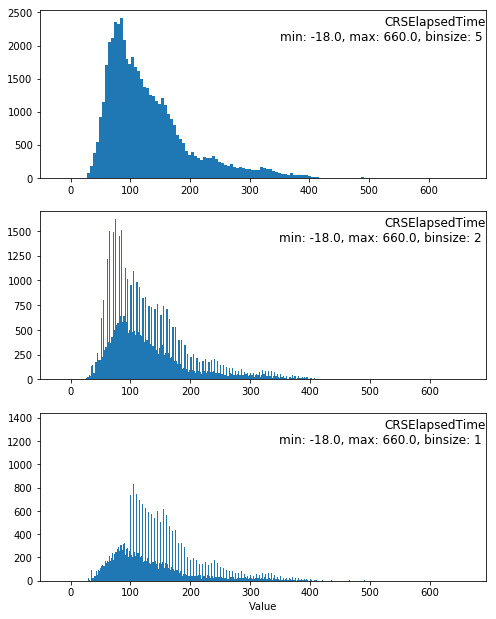

------------------------------------------------------------------------------------


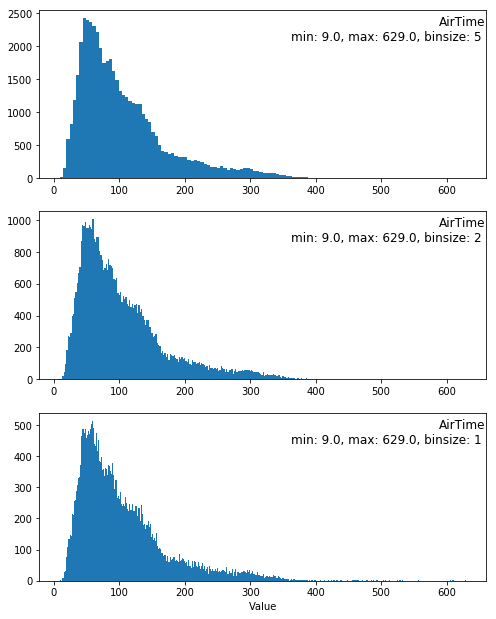

------------------------------------------------------------------------------------


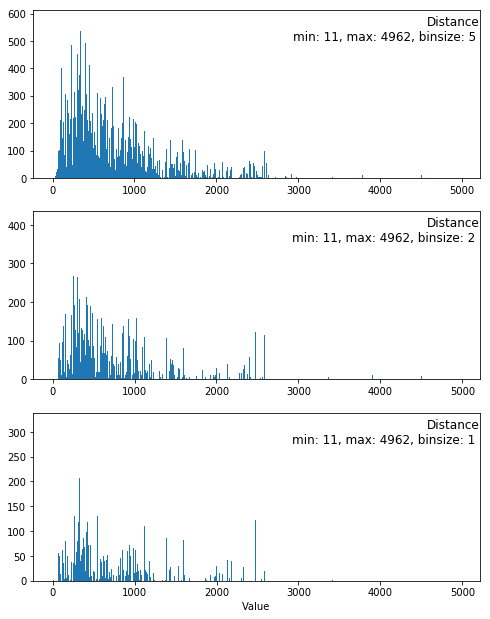

------------------------------------------------------------------------------------


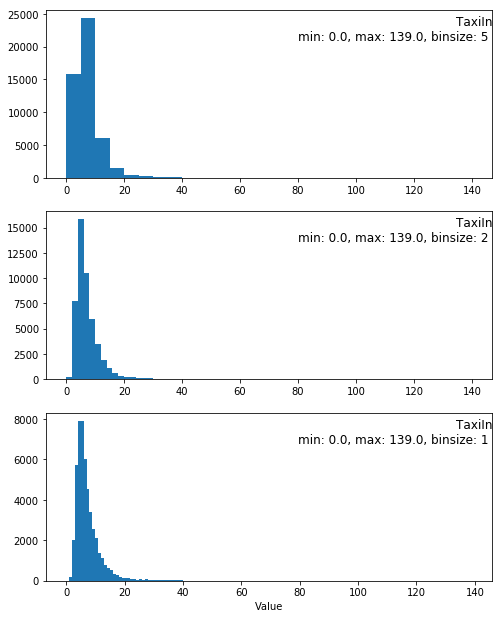

------------------------------------------------------------------------------------


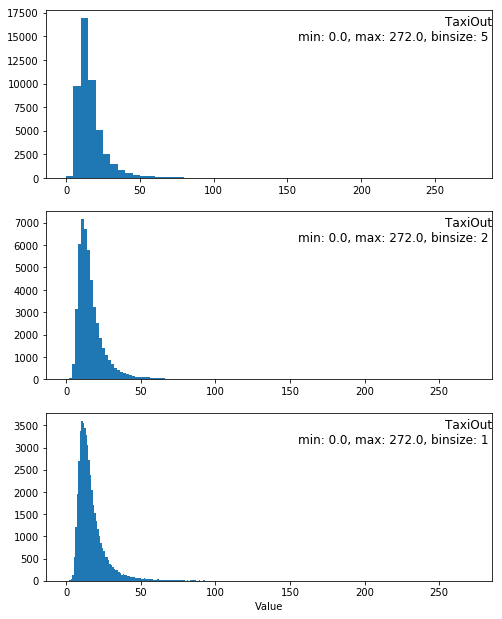

------------------------------------------------------------------------------------


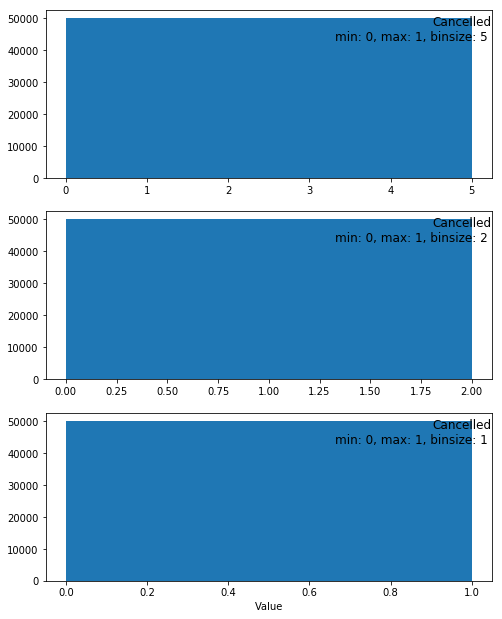

------------------------------------------------------------------------------------


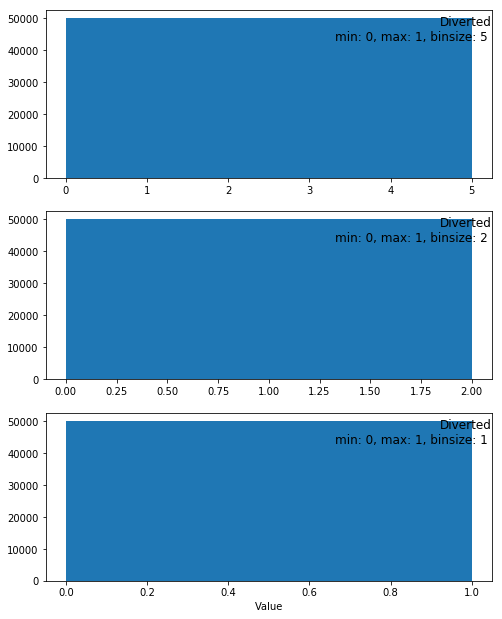

------------------------------------------------------------------------------------


In [31]:
numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
    max_values = [flights[var].max(), flights[var].max(), flights[var].max()]
    binsizes = [5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

<br>Zoom in on 'CRSElapsedTime' Distribution<br><br>

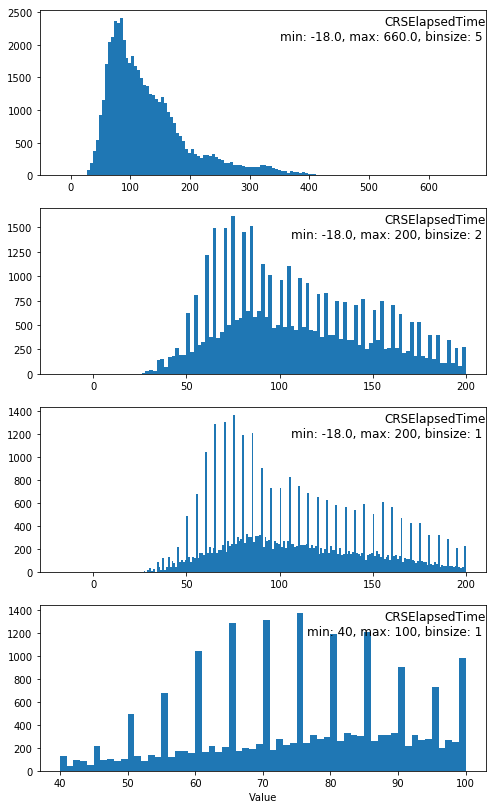

In [32]:
numPlots = 4;
var = 'CRSElapsedTime'
min_values = [flights[var].min(), flights[var].min(), flights[var].min(), 40]
max_values = [flights[var].max(), 200, 200, 100]
#max_values = [flights[var].max(), 200, flights[var].max()]
binsizes = [5, 2, 1, 1]
plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)

<a id='univariate_otherNumericVar_initial_observations'></a>
([Top of Page](#top_of_page))<br>

**Other Numeric Variables - Initial Observations**

* **'Month'** - The number of flights during spikes during December. I am not surprised at this finding, but I find it interesting to visualize the magnitude of the spike.
* **'DepTime'**:
  - The number of departures between 6:00 am and 7:00 pm is roughly constant
  - There are very few departures between 12:00 am and 5:00 am
* **'CRSDepTime'**
  - There are a large number of departures _scheduled_ for 7:00 am.
  - Departures are frequently scheduled on the hour or on the half hour
* **'ArrTime'** - The number of arrivals is roughly constant from 9:00 am to 10:00 pm.
* **'ActualElapsedTime'** - The most frequent elapsed time is ~90 minutes
* **'CRSElapsedTime'** - Flight lengths have a tendency to scheduled on 5 minute intervals
* **'AirTime'** - There is some slight multi-modality to 'AirTime'

<span style="color:blue">

## Next Steps
* Add a plot matrix 
* Overlay histograms of delay types filtered on a categorical variable
  - using an r x c subplots approach
    - each row r[i] could have plot(s) with a specific type of delay, such as 'ArrDelay'
    - each col c[i] could have plot(s) with a specific type of categorical variable, such as 'CancellationCode'
      - then each individual plot could be the distribution associated with that value of the categorical variable
      - for instance:
        - the distribution of 'ArrDelay' counts for 'CancellationCode' A
        - the distribution of 'ArrDelay' counts for 'CancellationCode' B, etc.
  - violin plots or box plots or ridgeline plots would also work in lieu of histograms
* Add a correlation matrix
* Check python gallery link(s) for other plot types that may be illuminating
* Check link with 'graphic scheme' of plot types for additional ideas
</span>

<a id='univariate_exploration_summary'></a>
([Top of Page](#top_of_page))
## Univariate Exploration - Summary

<a id='univariate_exploration_describe_distributions_of_interest'></a>
([Top of Page](#top_of_page))
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?<br>

<span style="color:red">

# UPDATE THIS
</span>

<br>**'Delay' Variables - Initial Observations**
* **'ArrDelay'** and **'DepDelay'** have roughly normal distributions around zero, albeit with some outliers causing a right-handed skew.
* **'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'** each have a large number of points at or very near zero. This is disguising the true nature of the distribution.
  * These distributions will have to be explored in greater detail
* **'NASDelay'** seems to have bi-modal distribution, which was not expected.
  * This bears further exploration.
* **'SecurityDelay'** seems to be almost uniformly zero.
  * It turns out this parameter is not _uniformly_ zero, but since it is _mostly_ zeros, this parameter is not a large driver of delays and will be ignored
* **'LateAircraftDelay'** seems to have a spike in frequency around 20 minutes

**'Delay' Variables - Additional Observations**
* **'CarrierDelay'** - appears to be logarithmic
* **'WeatherDelay'** - appears to be roughly logarithmic as well, albeit noisier than 'CarrierDelay'
* **'NASDelay'** (i.e., National Air System Delay) - has a large spike in frequency at 15 minutes. This probably represents some sort of standard delay.
* **'LateAircraftDelay'** - has a spike at roughly 20 minutes, after which it is approximately logarithmic

**Other Numeric Variables - Initial Observations**
* **'Month'** - The number of flights during spikes during December. I am not surprised at this finding, but I find it interesting to visualize the magnitude of the spike.
* **'DepTime'**:
  - The number of departures between 6:00 am and 7:00 pm is roughly constant
  - There are very few departures between 12:00 am and 5:00 am
* **'CRSDepTime'**
  - There are a large number of departures _scheduled_ for 7:00 am.
  - Departures are frequently scheduled on the hour or on the half hour
* **'ArrTime'** - The number of arrivals is roughly constant from 9:00 am to 10:00 pm.
* **'ActualElapsedTime'** - The most frequent elapsed time is ~90 minutes
* **'CRSElapsedTime'** - Flight lengths have a tendency to scheduled on 5 minute intervals
* **'AirTime'** - There is some slight multi-modality to 'AirTime'


<a id='univariate_exploration_unusual_distributions_and_modifications'></a>
([Top of Page](#top_of_page))
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<a id='bivariate_exploration'></a>
([Top of Page](#top_of_page))
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
# vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
#                 'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
#                 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']
# 
# vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
#                      'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']
# 
# #vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'ArrTime', 'CRSElapsedTime', 'AirTime', 'Distance',
# #                     'TaxiIn', 'TaxiOut']
# 
# vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

<a id='bivariate_exploration_heatMaps'></a>
([Top of Page](#top_of_page))
### Heat Maps

**Create a correlation heatmap of numeric variables to get a better sense of their interaction**

# ------------ RESUME ------------

In [53]:
# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]

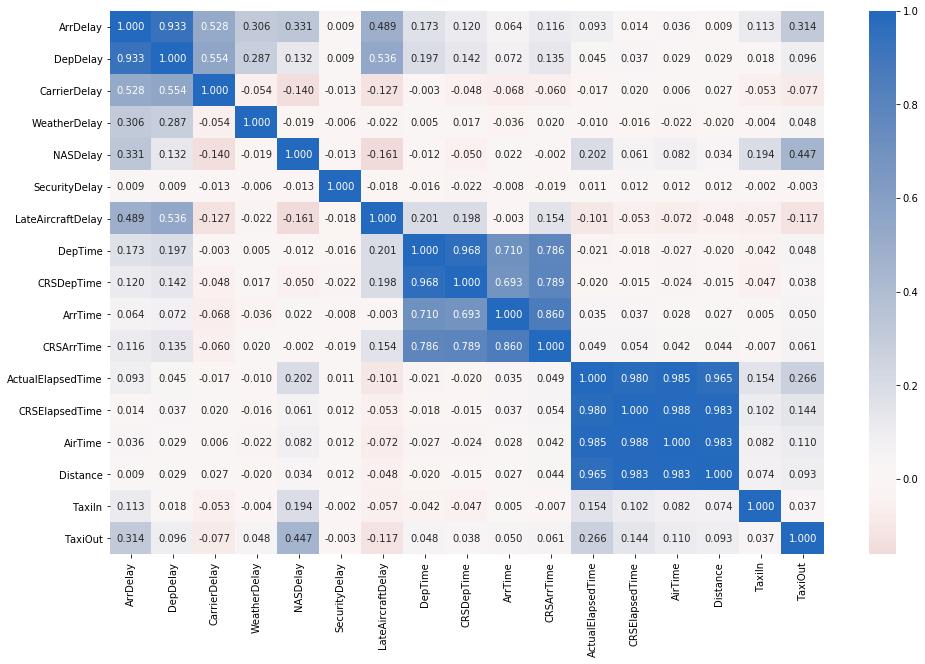

In [54]:
#choose vars to explore
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
        'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
        'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [16, 10])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

* Initial Observations:
  * **'SecurityDelay'** does not correlate to any other variables. It should be removed from consideration
  * **'ActualElaspedTime', 'CRSElapsedTime', 'AirTime',** and **'Distance'** are only significantly correlated with one another. They should be removed from consideration.
    * However, **'ActualElaspedTime'** and **'CRSElapsedTime'** do have a correlation with **'TaxiIn'** and **'TaxiOut'**
    * If **'TaxiIn'** and **'TaxiOut'** become parameters of interest, this may be worth remembering  

**Remove 'SecurityDelay', 'ActualElaspedTime', 'CRSElapsedTime', 'AirTime', and 'Distance' from the heatmap to make it easier to digest**

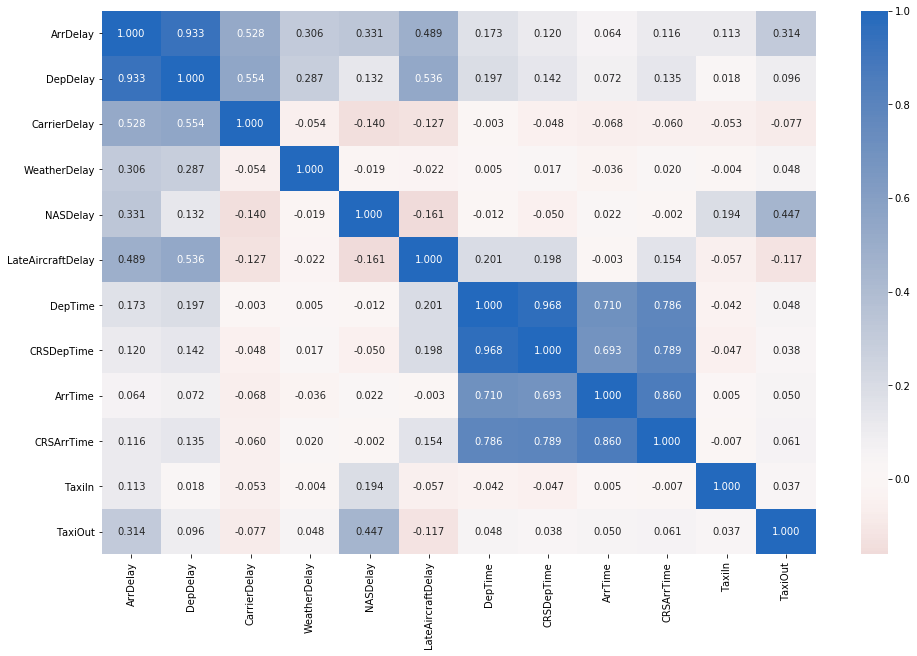

In [55]:
#choose vars to explore
    # removed: 'SecurityDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance'
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
        'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [16, 10])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

* 'ArrDelay' Observations:
  * * **'ArrDelay'** is most correlated with other delay types, with **'DepDelay'** being the strongest correlation. This makes sense.
  * * **'LateAircraftDelay', 'CarrierDelay', 'NASDelay',** and **'TaxiOut'** form the next strongest tier of correlations with **'ArrDelay'**
  * * **'WeatherDelay'** may also warrant looking at, although the correlation is weaker<br><br>
 
* Additional Observations:
  * * **'NASDelay'** is more strongly correlated with **'ArrDelay'** than with **'DepDelay'**
  *   * Upon first glance, **'NASDelay'** appears to be a delay that is either more prevalant during arrival or perhaps introduced during arrival
  *   * Upon second glance however, **'NASDelay'** has a stronger correlation with **'TaxiIn'** and **'TaxiOut'**, implying it is more dependent on airport congestion than upon the arrival phase of a flight<br><br>
 
* Potential Variables to Remove from Further Analysis:
  * **'ArrTime'** and **'CRSArrTime'** do not have strong correlations with variables other than **'DepTime'** and **'CRSDepTime'**
  * **'DepTime'** and **'CRSDepTime'** do not have particularly strong correlations with other variables either, but do happen to have some slight correlations with **'LateAircraftDelay', 'ArrDelay',** and **'DepDelay'**
  * **\['ArrTime', 'CRSArrTime', 'DepTime', 'CRSDepTime'\]** will be removed form consideration for the time being

**Look at a heatmap with just the delay variables, along with \['DepTime', 'CRSDepTime', 'TaxiIn', 'TaxiOut'\] to see if it makes more sense or if anything else sticks out**

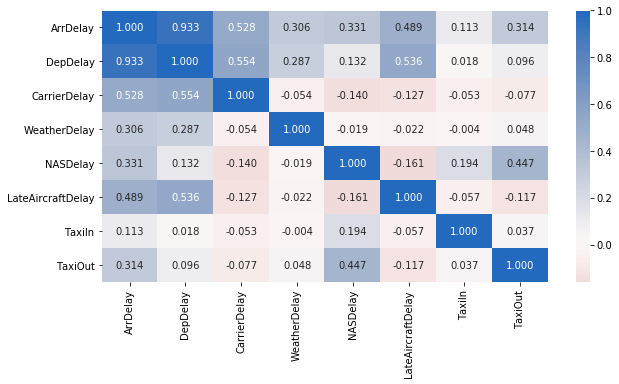

In [56]:
#choose vars to explore
    # removed: 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
        'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [57]:
#df['A'].corr(df['B'])
print(flights_samp['ArrDelay'].corr(flights_samp['DepDelay']))
print(flights_samp['ArrDelay'].corr(flights_samp['CarrierDelay']))
print(flights_samp['ArrDelay'].corr(flights_samp['ArrDelay']))

0.9327595264707927
0.5276337226520512
1.0


In [58]:
flights_samp['CarrierDelay'].describe()

count    21620.00000
mean        16.09334
std         40.58552
min          0.00000
25%          0.00000
50%          0.00000
75%         16.00000
max       1090.00000
Name: CarrierDelay, dtype: float64

In [59]:
flights_samp.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,100000.0,100000.000000,100000.000000,100000.000000,98024.000000,100000.000000,97815.000000,100000.000000,100000.000000,97767.000000,...,100000.000000,97815.000000,98014.000000,100000.000000,100000.000000,21620.00000,21620.000000,21620.000000,21620.000000,21620.000000
mean,2008.0,6.383760,15.734230,3.925680,1334.763262,1326.975710,1481.701160,1495.050680,2223.376180,127.644113,...,728.936550,6.855646,16.427398,0.019940,0.002390,16.09334,3.214986,17.207308,0.095328,20.640842
std,0.0,3.399492,8.789196,1.988194,478.271998,464.524928,505.344156,482.694241,1961.102737,70.415278,...,564.577561,4.862194,11.186819,0.139795,0.048829,40.58552,21.153870,31.218320,2.272261,38.650641
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,929.000000,927.000000,1108.000000,1115.000000,622.750000,77.000000,...,326.000000,4.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1325.500000,1320.000000,1512.000000,1517.000000,1572.000000,110.000000,...,581.000000,6.000000,14.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1730.000000,1719.000000,1909.500000,1908.000000,3505.000000,157.000000,...,954.000000,8.000000,19.000000,0.000000,0.000000,16.00000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9740.000000,665.000000,...,4962.000000,130.000000,362.000000,1.000000,1.000000,1090.00000,868.000000,434.000000,169.000000,652.000000


* Thoughts thus far:
  * It might be useful to look at correlations between delay variables where the following delay variables are not zero:  \['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay'\]

**Things to do:**

* Custom Heatmap:
  * check what df.corr() outputs (I suspect a matrix)
    * ----> outputs a dataframe
  * create a list of variables, checkVars, to check against 'ArrDelay' and 'DepDelay'
    * Also create a list of what needs done (i.e., filtered) to each checkVar
  * then create multiple dataframes of (the filtered checkVars) and (the correspondingly filtered 'ArrDelay' column)
    * Alternate approach: 
      * create a single dataframe with multiple (different length) columns.
      * normalize the columns by adding NANs to columns that are shorter
  * create a matrix of the correlations between filtered variables

In [60]:
df_temp = flights_samp[vars].corr()
df_temp.head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TaxiIn,TaxiOut
ArrDelay,1.000000,0.932760,0.527634,0.306300,0.330554,0.489092,0.112981,0.313558
DepDelay,0.932760,1.000000,0.554356,0.287239,0.131814,0.536360,0.018156,0.096224
CarrierDelay,0.527634,0.554356,1.000000,-0.053632,-0.139603,-0.127185,-0.053233,-0.076726
WeatherDelay,0.306300,0.287239,-0.053632,1.000000,-0.019257,-0.022266,-0.004081,0.048173
NASDelay,0.330554,0.131814,-0.139603,-0.019257,1.000000,-0.161166,0.193953,0.447173


In [61]:
df_temp.loc['ArrDelay'].WeatherDelay

0.30629992815361

**'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'** each have a large number of points at or very near zero. This is disguising the true nature of these distributions.

# ------------ SKIP ------------

In [ ]:
varCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

for i in range(len(varCorr)):
    if varCorr[i] in varsFilt:
        print(varCorr[i] + ' IS IN varsFilt')
    else:
        print(varCorr[i])

In [ ]:
varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

#df['A'].corr(df['B'])
#flights_samp['ArrDelay'].corr(flights_samp['DepDelay'])

#df_filtered = mask the df by the given varToFilter
#from df_filtered:  correlate every var in varToCorr
  #store the corr values as follows:
    # flights_sampFilt.loc[varsFilt[i]].varCorr[i] = df_filtered[varsFilt[i]].corr(df_filtered[varCorr[i]])

for i in range(len(varsCorr)):
    if varCorr[i] in varsFilt:
        print(varsCorr[i] + ' IS IN varsFilt')
    else:
        print(varsCorr[i])

In [ ]:
mask = flights['CarrierDelay'] > 0
#flights[mask].CarrierDelay.count()
flights[mask].shape[0]

# ------------ RESUME ------------

In [62]:
varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

In [63]:
# def filter_zeros(df, varFilt, varCompare):
#     mask = df[varFilt] > 0
#     df = df[mask]
#     df = df[[varFilt, varCompare]]
#     return df

def filter_zeros(df, varCompare, varFilt):
    mask = df[varFilt] > 0
    df = df[mask]
    df = df[[varCompare, varFilt]]
    return df

In [ ]:
# i=0
# j=2
# print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
# filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# 
# df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
# print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
#                   ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
#                   ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
# 
# i=2
# j=0
# print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
# filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# 
# df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
# print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
#                   ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
#                   ', j_count:' + str(df_twoVars[varsCorr[j]].count()))

In [64]:
#flights_samp.shape
#flights_samp[varsCorr[1]].shape
flights_samp[varsCorr[1]].count()
#flights_samp.info()

98024

**Create a custom heatmap wherein zero values are ignored for the constituent 'Delay' variables**
* i.e., 'Delay' variables that are not 'ArrDelay' or 'DepDelay'

In [65]:
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)
#flights_varsCorr = flights_varsCorr.fillna(0)

for i in range(len(varsCorr)):
    
    # print statements for debugging
    print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
        
    for j in range(len(varsCorr)):
        
        # case: variable being assessed against itself
        if varsCorr[i] == varsCorr[j]:
            current_corr = 1
            
            print('     1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
            
        # case: non-Delay variable being assessed against a 'Delay' variable
        elif varsCorr[j] in varsFilt:
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
            current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
            
            print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
                  ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
            
        # base case: non-delay variable assessed against a non-delay variable
        else:
            # -----> make sure to check for NANs
            current_corr = flights_samp[varsCorr[i]].corr(flights_samp[varsCorr[j]])
            
            print('   reg, corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        
        flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr

#flights_varsCorr

'ArrDelay': 97767 rows
     1,  corr,shape w/ ArrDelay: 1, i_count:97767, j_count:97767
   reg, corr,shape w/ DepDelay: 0.9327595264707927, i_count:97767, j_count:98024
    f1,  corr,shape w/ CarrierDelay: 0.8223036789821816, i_count:9393, j_count:9393
    f1,  corr,shape w/ WeatherDelay: 0.7770848881592928, i_count:1446, j_count:1446
    f1,  corr,shape w/ NASDelay: 0.523440870515765, i_count:13231, j_count:13231
    f1,  corr,shape w/ LateAircraftDelay: 0.8034484736767803, i_count:9799, j_count:9799
   reg, corr,shape w/ TaxiIn: 0.11298133774628819, i_count:97767, j_count:97815
   reg, corr,shape w/ TaxiOut: 0.3135579456367697, i_count:97767, j_count:98014
'DepDelay': 98024 rows
   reg, corr,shape w/ ArrDelay: 0.9327595264707927, i_count:98024, j_count:97767
     1,  corr,shape w/ DepDelay: 1, i_count:98024, j_count:98024
    f1,  corr,shape w/ CarrierDelay: 0.8252972280752553, i_count:9393, j_count:9393
    f1,  corr,shape w/ WeatherDelay: 0.7961928107284929, i_count:1446, j_count:1

<a id='recent_location'></a>
([Top of Page](#top_of_page))

<span style="color:red">

# RECENTLY HERE (7/20)
</span>

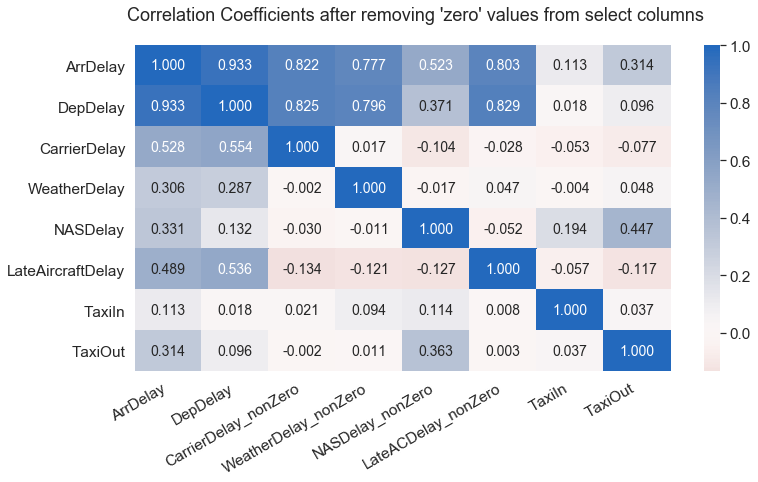

In [66]:
varsCorr_nonZero = ['ArrDelay', 'DepDelay', 'CarrierDelay_nonZero', 'WeatherDelay_nonZero', 'NASDelay_nonZero',
             'LateACDelay_nonZero', 'TaxiIn', 'TaxiOut']

# convert from string to float
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

sb.set(font_scale=1.4)    # default is 1.0

# correlation plot
plt.figure(figsize = [12, 6])
sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
           cmap = 'vlag_r', center = 0,
           xticklabels=varsCorr_nonZero)
plt.xticks(rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)

title_string=('Correlation Coefficients after removing \'zero\' values from select columns')
plt.suptitle(title_string, x=0.45, y=0.97, fontsize=18)
plt.show()

### Observations:
* When zero values are removed, **'ArrDelay'** and **'DepDelay'** are most strongly correlated with **'CarrierDelay'**, **'WeatherDelay'**, and **'LateAircraftDelay'**
* Removing zeros causes:
  **'WeatherDelay'** to be more strongly correlated with **'ArrDelay'** and **'DepDelay'** than **'NASDelay'**
    * This implies that Weather Delays happen less often than NAS Delays, but have a larger impact on arrival and departure delays

**Original Version**

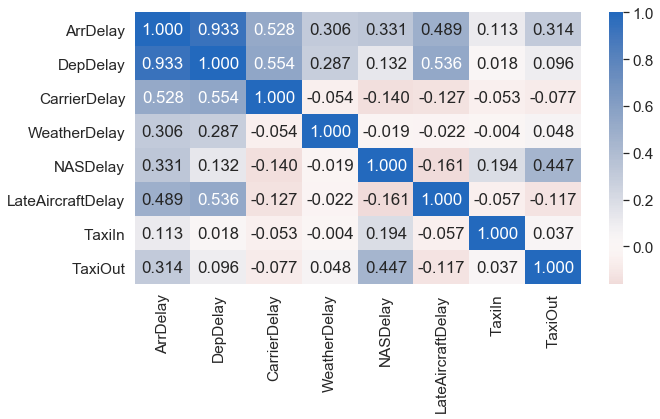

In [67]:
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
plt.figure(figsize = [10, 5])  # correlation plot
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

## Here are the current issues:

* **Dispositioned as non-issues:**
  * "Delay" parameters likely have NaN's that need turned to zeros
    * consider using <code>fillna(0)</code>
    * some "DelayNaN's may not be necessarily be zero
      * if all 'Delay' parameters show as NaN, but 'ArrDelay' or 'DepDelay' are non-zero, then the row should be removed
    * NOTE: once this is done, the conclusions from prior heatmaps and histograms may need to be revisited

## Next steps:
* assess change in "Delay" parameters based on:
  * time of year
  * airport (only look at top 10)
  * time of day
<br><br>
* create a new day of year variable

* do not assess for now:
  * over many years

<a id='current_location'></a>
([Top of Page](#top_of_page))

<span style="color:red">

## CURRENTLY HERE (7/20)
</span>

In [233]:
flights_samp_backup = flights_samp.copy(deep=True)

In [239]:
temp_date = pd.to_datetime(flights_samp.Year*10000 +
               flights_samp.Month*100 +
               flights_samp.DayofMonth, format='%Y%m%d')
flights_samp['Date'] = temp_date
del temp_date
#flights_samp.info()

In [96]:
top10_origin = flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10].index.tolist()
top10_carrier = flights_samp.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10].index.tolist()

flights_samp_reduced = flights_samp[flights_samp.Origin.isin(top10_origin)]
flights_samp_reduced = flights_samp_reduced[flights_samp_reduced.UniqueCarrier.isin(top10_carrier)]

(26756, 29)

<a id='bivariate_exploration_violinPlots'></a>
([Top of Page](#top_of_page))
### Violin Plots

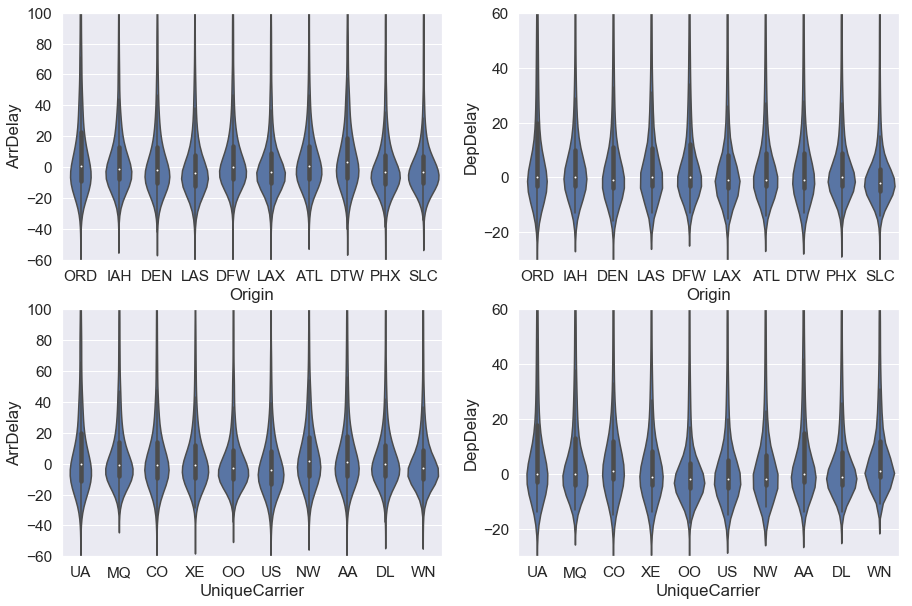

In [131]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
    
    sb.violinplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(ylim=(-30,60))

plt.show()

<a id='bivariate_exploration_boxPlots'></a>
([Top of Page](#top_of_page))
### Box Plots

**Create some Box Plots to better assess the nature of each distribution**

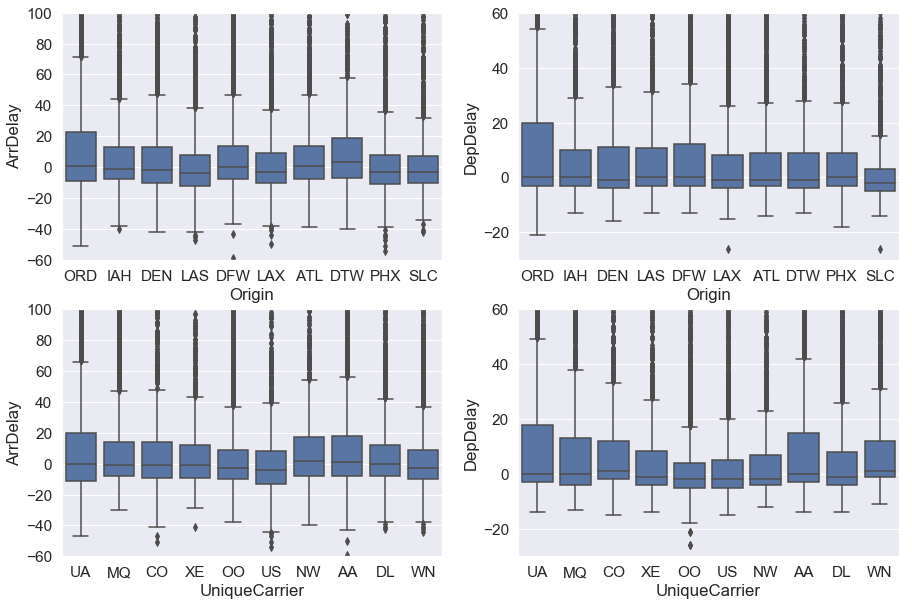

In [172]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
    
    sb.boxplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(ylim=(-30,60))

plt.show()

<a id='bivariate_exploration_swarmPlots'></a>
([Top of Page](#top_of_page))
### Swarm Plots

**Create some Swarm Plots to better assess the nature of each distribution**

* **NEED TO SAMPLE THE DATA OR SOMEHOW REDUCE IT TO MAKE IT QUICKER TO PLOT?**
* **ALSO NEED TO ADD AN (ALPHA=SMALL_NUMBER) ARGUMENT**

In [173]:
# default_color = sb.color_palette()[0]
# 
# ## right plot: swarm plot
# #plt.subplot(1, 3, 3)
# #sb.swarmplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# #plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
# 
# # plot origin and unique carrier arrival delay
# fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)
# 
# categoric_vars = ['Origin', 'UniqueCarrier']
# 
# for i in range(len(categoric_vars)):
#     var = categoric_vars[i]
#     #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     #sb.boxplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     sb.swarmplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     ax[i,0].set(ylim=(-60,100))
#     
#     sb.swarmplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,1], color = default_color)
#     ax[i,1].set(ylim=(-30,60))
# 
# plt.show()

<a id='bivariate_exploration_ridgeline_Plots'></a>
([Top of Page](#top_of_page))
### Ridgeline Plots

**Create some Ridge Line Plots to better assess the nature of each distribution**

/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


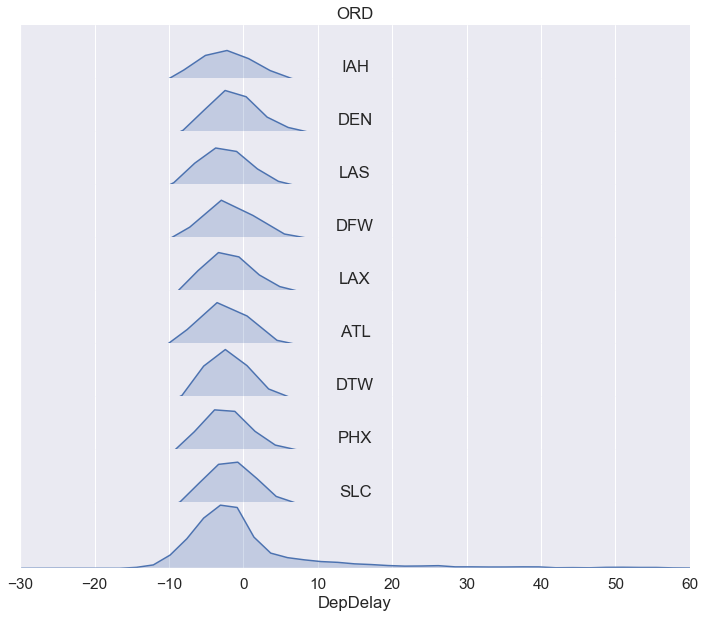

In [168]:
group_means = flights_samp_reduced.groupby(['Origin']).mean()
group_order = group_means.sort_values(['ArrDelay'], ascending = False).index

sb.set(font_scale=1.4)    # default is 1.0
# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = flights_samp_reduced, row = 'Origin', size = 1, aspect = 12,
                 gridspec_kws = {'hspace' : -0.2})

#g = sb.FacetGrid(data = flights_samp_reduced, row = 'Origin', size = 1, aspect = 12,
#                 row_order = group_order, gridspec_kws = {'hspace' : 1.5})
g.map(sb.kdeplot, 'DepDelay', shade = True)

# remove the y-axes
g.set(yticks=[])
g.set(xlim=[-30,60])
#g.despine(left=True)

g.set_titles('{row_name}')

**Create a Clustered Bar Chart to better assess the nature of each distribution**

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2',
             order = cat1_order, hue_order = cat2_order)
plt.legend()

**Create some Stacked Bar Plots to better assess the nature of each distribution**

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df['cat_var1'].value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}')

/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x720 with 0 Axes>

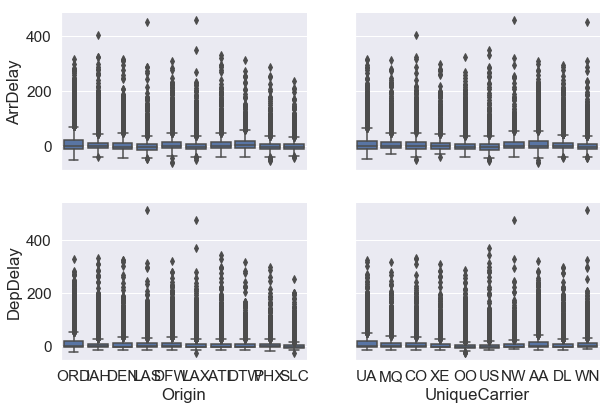

In [124]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = flights_samp_reduced, y_vars = ['ArrDelay', 'DepDelay'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)

sb.boxplot(x, y, color = default_color)

g.map(boxgrid)
plt.show();

In [91]:
#flights_samp.groupby('Origin').Origin.count()

#flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10]

#top10 = flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10].tolist()

#tweet_ids_images = df_images['tweet_id'].tolist()
#df_master = df_master[df_master.tweet_id.isin(tweet_ids_to_keep)]


#flights_samp_agg = flights_samp.groupby(['Origin','source']).agg({'count':sum})
#df_agg = df.groupby(['job','source']).agg({'count':sum})

#flights_samp.groupby('Origin').Origin.sort_values('mygroups', ascending=False)
#grouped.sort_values('mygroups', ascending=False)

list

In [91]:
flights_samp.CarrierDelay.count()
#flights_samp.count()
#flights_samp.groupby('CarrierDelay').CarrierDelay.count()

21762

In [90]:
df_twoVars = filter_zeros(flights_samp, 'ArrDelay', 'CarrierDelay')  # return 2 var df, filtered vars[j]>0

In [92]:
df_twoVars.count()

ArrDelay        42431
CarrierDelay    21762
dtype: int64

In [112]:
flights_samp.groupby('CarrierDelay').CarrierDelay.count()

CarrierDelay
0.0       12067
1.0         316
2.0         273
3.0         301
4.0         290
5.0         264
6.0         324
7.0         352
8.0         285
9.0         272
10.0        262
11.0        198
12.0        223
13.0        203
14.0        195
15.0        261
16.0        232
17.0        234
18.0        194
19.0        202
20.0        199
21.0        172
22.0        171
23.0        155
24.0        136
25.0        123
26.0        137
27.0        142
28.0        131
29.0        119
          ...  
417.0         1
428.0         1
437.0         1
438.0         1
442.0         1
451.0         1
452.0         1
453.0         1
455.0         1
461.0         1
465.0         1
468.0         1
475.0         1
480.0         1
499.0         1
514.0         1
524.0         1
526.0         1
540.0         3
543.0         1
585.0         1
597.0         1
634.0         1
738.0         1
777.0         1
782.0         1
956.0         1
963.0         1
970.0         1
1126.0        1
Name: Carri

In [85]:
#flights_samp.groupby('CarrierDelay').CarrierDelay.count()
#CarrierDelay

#train = pd.read_csv("train.csv")
null_columns=flights_samp.columns[flights_samp.isnull().any()]
flights_samp[null_columns].isnull().sum()

DepTime               1915
ArrTime               2115
TailNum               1156
ActualElapsedTime     2163
CRSElapsedTime           5
AirTime               2163
ArrDelay              2163
DepDelay              1915
TaxiIn                2115
TaxiOut               1926
CancellationCode     98067
CarrierDelay         78238
WeatherDelay         78238
NASDelay             78238
SecurityDelay        78238
LateAircraftDelay    78238
dtype: int64

# ------------ SKIP ------------

**Notional Code to create some violin plots**

In [115]:
flights_samp.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
numeric_vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'table', 'x', 'y', 'z']
categoric_vars = ['Origin', 'Dest', 'UniqueCarrier']

varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

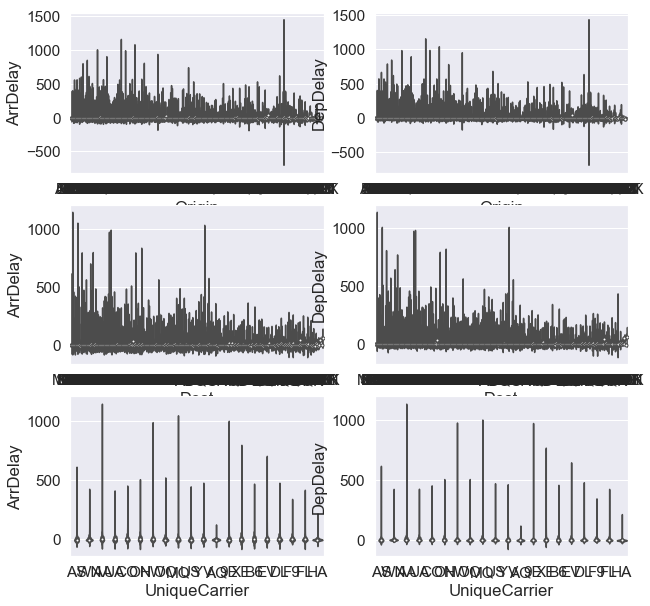

In [118]:
default_color = sb.color_palette()[0]

# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

categoric_vars = ['Origin', 'Dest', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_samp, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    #ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    #ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    
    # second column of plots (example .ipynb analysis has different y-axis transformations for column 0 and column 1)
    sb.violinplot(data = flights_samp, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    #ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    #ax[i,1].set_yticklabels(carat_ticks)
    #ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

In [ ]:
# # correlation plot, but with a different cmap
# plt.figure(figsize = [10, 5])
# cmap = sb.cubehelix_palette(start=4.5, light=1.6, as_cmap=True, reverse=False)
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
#            cmap = cmap, center = 0, xticklabels=varsCorr_nonZero)
# plt.xticks(rotation=60)
# plt.show()


# # correlation plot, but with a different cmap
# plt.figure(figsize = [10, 5])
# cmap = sb.cubehelix_palette(start=4.5, light=1.6, as_cmap=True, reverse=False)
# cbarlabel="Correlation"
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
#            cmap = 'YlGn', center = 0, xticklabels=varsCorr_nonZero, 
#            cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom"))
# plt.xticks(rotation=60)
# plt.show()

#sns.set(font_scale=3)

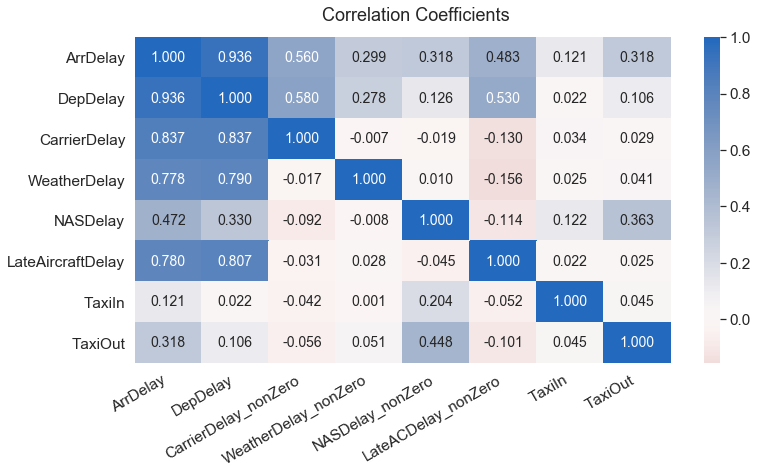

In [229]:
varsCorr_nonZero = ['ArrDelay', 'DepDelay', 'CarrierDelay_nonZero', 'WeatherDelay_nonZero', 'NASDelay_nonZero',
             'LateACDelay_nonZero', 'TaxiIn', 'TaxiOut']

# convert from string to float
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

sb.set(font_scale=1.4)

# correlation plot
plt.figure(figsize = [12, 6])
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
#            cmap = 'vlag_r', cbar_kws={'label': 'Correlation Coefficient'}, center = 0,
#            xticklabels=varsCorr_nonZero)
sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
           cmap = 'vlag_r', center = 0,
           xticklabels=varsCorr_nonZero)
#sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 12},
#           cmap = 'vlag_r', cbar_kws={'label': 'Corr Coeff.'}, center = 0,
#           xticklabels=varsCorr_nonZero)
plt.xticks(rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)

#plt.figure.cbar.set_label('Activation',size=18)
#plt.cbar(labelsize=20)
#colorbar.tick_params(labelsize=20)

title_string=('Correlation Coefficients')
plt.suptitle(title_string, x=0.45, y=0.95, fontsize=18)
plt.show()

AttributeError: 'function' object has no attribute 'set_label'

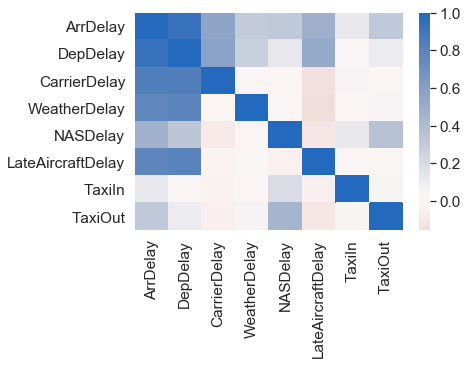

In [228]:
fig = plt.figure()
#ax = fig.add_subplot(111)
ax = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)
# x = np.arange(10,3000,100)
# y = np.arange(10,3000,100)
# X,Y = np.meshgrid(x,y)
# Z = np.random.random(X.shape)*8000000
# surf = ax.contourf(X,Y,Z, 8, cmap=plt.cm.jet)
#ax.set_ylabel('Log Frequency (Hz)')
#ax.set_xlabel('Log Frequency (Hz)')
ax.xticklabels=varsCorr_nonZero

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))


# # defining custom minor tick locations:
# ax.xaxis.set_minor_locator(plt.FixedLocator([50,500,2000]))
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')
# ax.tick_params(axis='both',reset=False,which='both',length=8,width=2)
#cbar = fig.colorbar(surf, shrink=0.5, aspect=20, fraction=.12,pad=.02)
cbar = fig.colorbar
cbar.set_label('Corr Coeff.',size=18)

# access to cbar tick labels:
cbar.ax.tick_params(fontsize=15) 
plt.show()

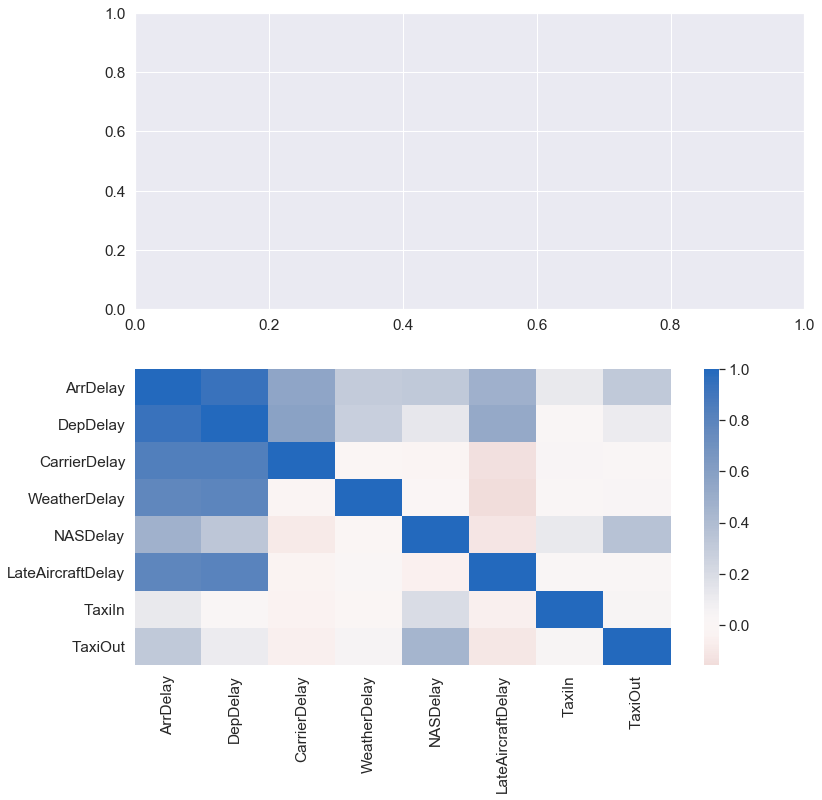

In [226]:
# correlation plot
numPlots = 2
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize = [12, numPlots * 6], squeeze=False)

#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

axarr[0,0] = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)

# axarr[0,0] = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)

# use matplotlib.colorbar.Colorbar object
#cbar = ax[0].collections[0].colorbar

# here set the labelsize by 20
#cbar.ax.tick_params(labelsize=20)

# ax[1] = sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 12},
#            cmap = 'vlag_r', cbar_kws={'label': 'Corr Coeff.'}, center = 0,
#            xticklabels=varsCorr_nonZero)

#ax[1].xticklabels=varsCorr_nonZero
# plt.xticks(rotation=30, ha='right', fontsize=12)
# plt.yticks(fontsize=12)
# 
# #plt.figure.cbar.set_label('Activation',size=18)
# #plt.cbar(labelsize=20)
# #colorbar.tick_params(labelsize=20)
# 
# title_string=('Correlation Coefficients')
# plt.suptitle(title_string, x=0.45, y=0.95, fontsize=17)
plt.show()

In [80]:
flights_samp[varsCorr].corr()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TaxiIn,TaxiOut
ArrDelay,1.000000,0.923588,0.485714,0.250332,0.368150,0.528592,0.130806,0.330406
DepDelay,0.923588,1.000000,0.501897,0.230182,0.151968,0.580850,0.029576,0.102744
CarrierDelay,0.485714,0.501897,1.000000,-0.058913,-0.145180,-0.132190,-0.051379,-0.072442
WeatherDelay,0.250332,0.230182,-0.058913,1.000000,-0.012492,-0.035313,0.010108,0.051129
NASDelay,0.368150,0.151968,-0.145180,-0.012492,1.000000,-0.138669,0.219511,0.456506
LateAircraftDelay,0.528592,0.580850,-0.132190,-0.035313,-0.138669,1.000000,-0.036274,-0.104087
TaxiIn,0.130806,0.029576,-0.051379,0.010108,0.219511,-0.036274,1.000000,0.037284
TaxiOut,0.330406,0.102744,-0.072442,0.051129,0.456506,-0.104087,0.037284,1.000000


In [81]:
#flights_varsCorr.info()
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

flights_varsCorr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, ArrDelay to TaxiOut
Data columns (total 8 columns):
ArrDelay             8 non-null float64
DepDelay             8 non-null float64
CarrierDelay         8 non-null float64
WeatherDelay         8 non-null float64
NASDelay             8 non-null float64
LateAircraftDelay    8 non-null float64
TaxiIn               8 non-null float64
TaxiOut              8 non-null float64
dtypes: float64(8)
memory usage: 896.0+ bytes


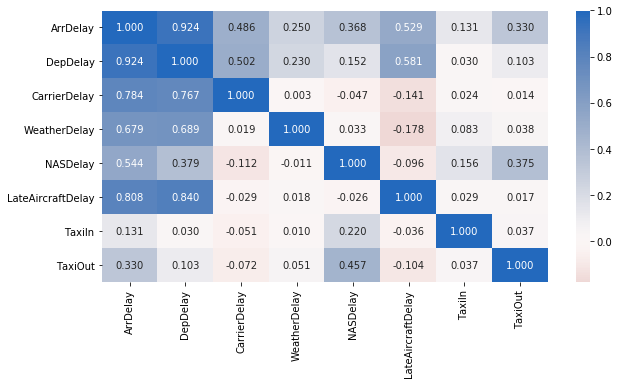

In [82]:
# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#plt.figure(figsize = [16, 10])
#sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
#           cmap = 'vlag_r', center = 0)

In [66]:
#flights_varsCorr = pd.DataFrame()
#flights_varsCorr.set_index(varsCorr)
#flights_varsCorr = pd.DataFrame()
#flights_varsCorr = pd.DataFrame(index=varsCorr)
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)

#flights_varsCorr.set_index(var: varsCorr)

#flights_varsCorr.columns = varsCorr
#flights_varsCorr2 = flights_varsCorr.set_axis(varsCorr, axis=1, inplace=False)
#flights_varsCorr2

#flights_varsCorr.columns = ['make', 'buy']
#flights_varsCorr.columns
#flights_varsCorr

#flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr
flights_varsCorr

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TaxiIn,TaxiOut
ArrDelay,0,0,0,0,0,0,0,0
DepDelay,0,0,0,0,0,0,0,0
CarrierDelay,0,0,0,0,0,0,0,0
WeatherDelay,0,0,0,0,0,0,0,0
NASDelay,0,0,0,0,0,0,0,0
LateAircraftDelay,0,0,0,0,0,0,0,0
TaxiIn,0,0,0,0,0,0,0,0
TaxiOut,0,0,0,0,0,0,0,0


In [57]:
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)

for i in range(len(varsCorr)):
    
    # print statements for debugging
    print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
    
    for j in range(len(varsCorr)):
        
        # one
        if varsCorr[i] == varsCorr[j]:
            current_corr = 1
            
            # print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
            #       ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
            #       ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        
        # filt one (if j is in varsFilt)
        elif varsCorr[i] in varsFilt:
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
            current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
            
            # print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
            #       ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
            #       ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
        
        # base case, reg (if nothing else is true):
        else:
            # -----> make sure to check for NANs
            current_corr = flights_samp[varsCorr[i]].corr(flights_samp[varsCorr[j]])
        
            print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        #flights_varsCorr['temp'] = current_corr
        #flights_varsCorr[varsCorr[i]] = current_corr
        #flights_varsCorr.loc[varsCorr[i]].varsCorr[j] = current_corr
        flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr

flights_varsCorr

'ArrDelay': 97834 rows
   corr,shape w/ DepDelay: 0.9291945183609114, i_count:97834, j_count:98097
   corr,shape w/ CarrierDelay: 0.4810471702456005, i_count:97834, j_count:21786
   corr,shape w/ WeatherDelay: 0.2919570150848137, i_count:97834, j_count:21786
   corr,shape w/ NASDelay: 0.35711545168944564, i_count:97834, j_count:21786
   corr,shape w/ LateAircraftDelay: 0.5192080849934095, i_count:97834, j_count:21786
   corr,shape w/ TaxiIn: 0.1296934831686694, i_count:97834, j_count:97875
   corr,shape w/ TaxiOut: 0.32239155971906946, i_count:97834, j_count:98083
'DepDelay': 98097 rows
   corr,shape w/ ArrDelay: 0.9291945183609113, i_count:98097, j_count:97834
   corr,shape w/ CarrierDelay: 0.5163986928647746, i_count:98097, j_count:21786
   corr,shape w/ WeatherDelay: 0.27216691235355306, i_count:98097, j_count:21786
   corr,shape w/ NASDelay: 0.14416552928828646, i_count:98097, j_count:21786
   corr,shape w/ LateAircraftDelay: 0.5668309075079729, i_count:98097, j_count:21786
   corr

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,TaxiIn,TaxiOut
ArrDelay,1,0.929195,0.481047,0.291957,0.357115,0.519208,0.129693,0.322392
DepDelay,0.929195,1,0.516399,0.272167,0.144166,0.566831,0.0284781,0.0953797
CarrierDelay,0.795447,0.801895,1,-0.00281871,-0.0457865,-0.140385,0.0262775,0.0204154
WeatherDelay,0.748492,0.756373,-0.035934,1,-0.00316275,-0.174297,0.0245301,0.0345578
NASDelay,0.536964,0.372332,-0.110603,-0.0112095,1,-0.113718,0.14015,0.379702
LateAircraftDelay,0.807876,0.840139,-0.0328464,-0.000153418,-0.0514934,1,0.0347259,-0.00714101
TaxiIn,0.129693,0.0284781,-0.0517256,0.0042105,0.207077,-0.028854,1,0.0401128
TaxiOut,0.322392,0.0953797,-0.0695949,0.0450278,0.458492,-0.111811,0.0401128,1


In [ ]:
for i in range(len(varsCorr)):
    for j in range(len(varsCorr)):
        
        # if variable is in varsFilt:
            # create a dataframe with the two appropriate columns
            # calculate corr coefficient between the two columns
            
        # else:
            # corr coefficient 
        if varsCorr[i] in varsFilt:        
            # return a two variable dataframe that is filtered by (first val > 0)
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
        else:
            df_twoVars = flights_samp[[varsCorr[i], varsCorr[j]]]
        
        # determine correlation coefficient based on filtered dataframe
        current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
        flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(df_twoVars.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(df_twoVars.shape[0]) + ' rows')
        
        # iterate through varsCorr
        for j in range(len(varsCorr)):
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:        
        for j in range(len(varsCorr)):
            # return a two variable dataframe that is filtered by (first val > 0)
            flights_sampFilt = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # iterate through varsCorr
        for j in range(len(varsCorr)):
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:        
        for j in range(len(varsCorr)):
            # return a two variable dataframe that is filtered by (first val > 0)
            flights_sampFilt = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
            
            #print(varsCorr[j] + ': ' + str(current_corr))
            # print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        # for j in range(len(varsCorr)):
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:
        # filter the dataframe by only those rows that have varsFilt[i] > 0
        mask = flights_samp[varsCorr[i]] > 0
        flights_sampFilt = flights_samp[mask]
        
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows_in_flights_sampFilt: ')
        for j in range(len(varsCorr)):
            current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            print(varsCorr[j] + ': ' + str(current_corr))
            # print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        for j in range(len(varsCorr)):
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:
        # filter the dataframe by only those rows that have varsFilt[i] > 0
        mask = flights_samp[varsCorr[i]] > 0
        flights_sampFilt = flights_samp[mask]
        
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows_in_flights_sampFilt: ')
        # for j in range(len(varsCorr)):
        #     print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        for j in range(len(varsCorr)):
            current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            print(varsCorr[j] + ': ' + str(current_corr))
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

* Custom variables:
  * Difference between ('ArrDelay' on a given day) and  ('ArrDelay' yearly min)
    * plotted for a given airline
    * plotted for a given airport
  * A given airport's relative increase or decrease in arrival delay
    * need to come up with the mean for a given day
    * then plot that mean over the course of the year
  * The effect of 'NASDelay', 'CarrierDelay' on ('ArrDelay', 'DepDelay') for:
    * a given airline
    * a given airport
  * The number of flights at a given airport

In [ ]:
# vars = ['CarrierDelay']
# numPlots = 3;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [0, 1, 1]
#     max_values = [150, 150, 150]
#     binsizes = [2, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='bivariate_exploration_scatterPlots'></a>
([Top of Page](#top_of_page))
### Scatter Plots

In [ ]:
#choose vars to explore
vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
                'TaxiIn', 'TaxiOut']

start = time.time()

# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]
#samples = np.random.choice(flights.shape[0], 50000, replace = False)
#flights_samp = flights.loc[samples,:]

# plot matrix
g = sb.PairGrid(data = flights_samp, vars = vars_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.008);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
                'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']

vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'ArrTime', 'CRSElapsedTime', 'AirTime', 'Distance',
                     'TaxiIn', 'TaxiOut']

vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

start = time.time()

# plot matrix
# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]
#samples = np.random.choice(flights.shape[0], 50000, replace = False)
#flights_samp = flights.loc[samples,:]

g = sb.PairGrid(data = flights_samp, vars = vars_numeric_temp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.008);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

<a id='bivariate_exploration_summary'></a>
([Top of Page](#top_of_page))
## Bivariate Exploration - Summary

<a id='bivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

<a id='bivariate_exploration_relationships_observed_unexpected'></a>
([Top of Page](#top_of_page))
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate_exploration'></a>
([Top of Page](#top_of_page))
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<a id='multivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

<a id='multivariate_exploration_relationships_observed_interesting_interactions'></a>
([Top of Page](#top_of_page))
### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='references_and_dead_ends'></a>
([Top of Page](#top_of_page))
# Miscellaneous References and Exploration Dead Ends

<a id='references'></a>
([Top of Page](#top_of_page))
## References

* [Types of charts](https://about.infogr.am/wp-content/uploads/2016/01/types-of-charts.jpg) - graphic scheme

* [Python Graph Gallery](https://python-graph-gallery.com), a site with hundreds of different chart types (and code samples) that can be created using Python
  * Python graph gallery - [list of possible seaborn plots](https://python-graph-gallery.com/category/seaborn/)
  * Python graph gallery - [list of possible matplotlib plots](https://python-graph-gallery.com/category/matplotlib/)
  
* Seaborn [heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Single Page ["cheat sheet" for plotting with Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

* StackOverflow page describing [how to fix irregular spacing of xticklabels that have been rotated](https://stackoverflow.com/questions/21477465/matplotlib-python-barplot-position-of-xtick-labels-have-irregular-spaces-betwee)

* Matplotlib - [colorbar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html)

* Matplotlib documentation: [some annotated heatmap examples](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py)

* StackOverflow page describing [how to modify colorbar properties](https://stackoverflow.com/questions/6567724/matplotlib-so-log-axis-only-has-minor-tick-mark-labels-at-specified-points-also/6568248#6568248) - references plots that are plotted using the  'Fig, ax' coding style

* StackOverflow example of how to [append the same string to a list of strings in Python](https://stackoverflow.com/questions/2050637/appending-the-same-string-to-a-list-of-strings-in-python):
  * <code>[s + mystring for s in mylist]</code>

* StackOverflow page on [how to convert multiple columns into one datetime column in pandas](https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas/37103131)

<a id='dead_ends'></a>
([Top of Page](#top_of_page))
## Dead Ends

<a id='dead_ends_preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

**Use chardet to detect encoding**

* NOTE:
  * this is currently an infinite loop
  * need to add a limit for when to stop reading lines if detector is not done

In [ ]:
# import chardet
# from chardet.universaldetector import UniversalDetector
# 
# detector = UniversalDetector()
# with open('2002.csv', 'rb') as f:
#     for line in f:
#         detector.feed(line)
#         if detector.done: break
# detector.close()
# 
# print(detector.result)

**Loading Multiple Years of Data**

Load in files that already have the default pandas encoding ('UTF-8')

In [ ]:
# approx. 200 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# # flights_2008 = pd.read_csv('2007.csv')
# # flights_2007 = pd.read_csv('2007.csv')
# # flights_2006 = pd.read_csv('2006.csv')
# # flights_2005 = pd.read_csv('2005.csv')
# # flights_2004 = pd.read_csv('2004.csv')
# # flights_2003 = pd.read_csv('2003.csv')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Load in files with other encodings**
* NOTE:
   * 'cp1252' may not be correct
   * 'ISO-8859-1' may actually be the proper encoding

In [ ]:
# approx. 80 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_2002 = pd.read_csv('2002.csv', encoding='cp1252')
# flights_2001 = pd.read_csv('2001.csv', encoding='cp1252')
# flights_2000 = pd.read_csv('2000.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 100 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1999 = pd.read_csv('1999.csv', encoding='cp1252')
# flights_1998 = pd.read_csv('1998.csv', encoding='cp1252')
# flights_1997 = pd.read_csv('1997.csv', encoding='cp1252')
# flights_1996 = pd.read_csv('1996.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1995 = pd.read_csv('1995.csv', encoding='cp1252')
# flights_1994 = pd.read_csv('1994.csv', encoding='cp1252')
# flights_1993 = pd.read_csv('1993.csv', encoding='cp1252')
# flights_1992 = pd.read_csv('1992.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1991 = pd.read_csv('1991.csv', encoding='cp1252')
# flights_1990 = pd.read_csv('1990.csv', encoding='cp1252')
# flights_1989 = pd.read_csv('1989.csv', encoding='cp1252')
# flights_1988 = pd.read_csv('1988.csv', encoding='cp1252')
# flights_1987 = pd.read_csv('1987.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Preliminary Wrangling**

In [ ]:
print(flights['ArrDelay'].describe())
print('---------------------------------')
print(np.log10(flights['ArrDelay'].describe()))

<a id='dead_ends_univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

<a id='dead_ends_univariate_logScale_histograms'></a>
([Top of Page](#top_of_page))
### Log-Scale Histograms

Multi-histogram template for when there's a long tail in a variable's distribution

In [ ]:
# fig, ax = plt.subplots(nrows=6, figsize = [8,20])
# 
# max_values = [flights['ArrDelay'].max(),
#               flights['ArrDelay'].max(),
#               300, 300, 300, 300]
# log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
# ticks = [1, 3, 10, 30, 100, 300, 1000]
# labels = ['{}'.format(v) for v in ticks]
# for i in range(len(max_values)):
#     bin_edges = 10 ** np.arange(0, np.log10(max_values[i])+log_binsizes[i], log_binsizes[i])
#     ax[i].hist(data = flights, x = 'ArrDelay', bins = bin_edges);
#     ax[i].set_xscale('log')
#     ax[i].xaxis.set_ticks(ticks)
#     ax[i].xaxis.set_ticklabels(labels)
#     ax[i].set_title('max: ' + str(max_values[i]) +
#                     ', log_binsize: ' + 
#                     str(log_binsizes[i]) + ' ',
#                     pad=-20, loc='right')
# 
# plt.xlabel('Arrival Delay (min)')
# plt.show()

<a id='dead_ends_univariate_cleanHist_singleVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Single Variable, Standard Scale

Create clean histograms for 'ArrDelay' and 'DepDelay' only

In [ ]:
# var = 'ArrDelay'
# numPlots = 6
# min_values = [flights[var].min(), flights[var].min(),
#               -50, -50, -50, -50]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150]
# binsizes = [10, 5, 10, 5, 3, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

In [ ]:
# var = 'DepDelay'
# numPlots = 7
# min_values = [flights[var].min(), flights[var].min(),
#               -20, -20, -20, -20, -20]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150, 50]
# binsizes = [10, 5, 10, 5, 3, 1, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='dead_ends_univariate_cleanHist_multiVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Multiple Variables, Standard Scale

In [ ]:
# vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay',  'LateAircraftDelay']
# numPlots = 7;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [1, 1, 1, 1, 1, 1, 1]
#     max_values = [flights[var].max(), flights[var].max(),
#                   300, 300, 150, 150, 150]
#     binsizes = [5, 2, 5, 2, 5, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
#     print('------------------------------------------------------------------------------------')

<a id='dead_ends_univariate_density_plot_histogram'></a>
([Top of Page](#top_of_page))
### Density Plot Histogram

In [ ]:
# df_temp = flights.copy(deep=True)
# df_temp['ArrDelay'] = df_temp['ArrDelay'].fillna(0).astype(np.int64)
# 
# sb.distplot(df_temp['ArrDelay']);

<a id='templates'></a>
([Top of Page](#top_of_page))

<span style="color:red">
    
## Templates
</span>

<span style="color:red">

### Red Text
* bullet 1
* bullet 2
</span>